In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.integrate import odeint, ode, solve_ivp
from sympy.solvers import solve
import sympy 

# Problem 2

$$h^2\frac{d^2h}{dt^2} + 2 \left(\frac{dh}{dt}\right)^2+4L\cdot \left(\frac{1+h}{2+h}\right)\frac{dh}{dt} - \frac{4L}{2+h} = 0$$
It's equivalent to: 
\begin{equation*}
    \begin{cases}
        \frac{dh}{dt} = z\\
        h^2\frac{dz}{dt} + 2z^2 + 4L\cdot \left(\frac{1+h}{2+h}\right)z - \frac{4L}{2+h} = 0
    \end{cases}
    \Leftrightarrow
    \begin{cases}
        \frac{dh}{dt} = z\\
        \frac{dz}{dt}  = (\frac{4L}{2+h}- 4L\cdot \left(\frac{1+h}{2+h}\right)z - 2z^2)\backslash h^2
    \end{cases}
\end{equation*}

In [2]:
L = 0.5

# Create function of right part:
def dx(t, x):
    return [x[1], (4*L/(2+x[0]) - 4*L *x[1] *(1+x[0])/(2+x[0]) - 2*x[1]**2)/x[0]**2]

In [3]:
# Create first and last points of integration
t_start = 0
t_end = 6

In [4]:
# Initial conditions
x_0 = 0.01
x_1 = 0.5

In [5]:
t = np.linspace(t_start,t_end,1000000)

In [6]:
# Integrate using solve_ivp
solution = solve_ivp(dx, (t_start, t_end),[x_0, x_1],t_eval = t,method='DOP853',dense_output=True)

In [7]:
t_final = solution.t[solution.y[0]<2][-1]

Final time, when h=2 is 5.722775722775723


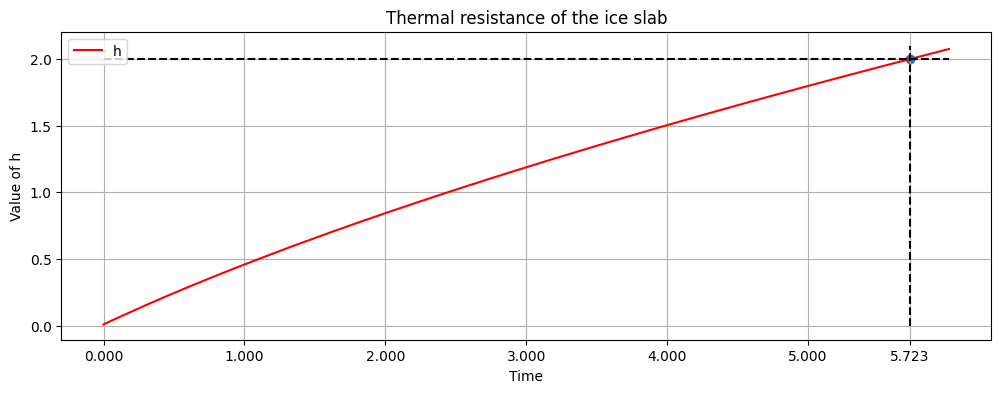

In [8]:
fig, axes = plt.subplots(1,1, figsize=(12,4))
axes.plot(solution.t, solution.y[0], 'r', label="h")
axes.legend()
axes.hlines(2,0,6,color = 'black',linestyles='--')
axes.vlines(t_final,0,2.1,color = 'black',linestyles='--')
axes.set_xticks([0,1,2,3,4,5,t_final])
axes.scatter(t_final,2)
axes.set_xlabel('Time')
axes.set_ylabel('Value of h')
axes.set_title('Thermal resistance of the ice slab')
axes.grid()
print(f'Final time, when h=2 is {t_final}')

# Problem 3

In [9]:
a1 = sympy.Symbol(r'a_1')
a0 = sympy.Symbol(r'a_0')
b1 = sympy.Symbol(r'b_1')
b0= sympy.Symbol(r'b_0')
hl = sympy.Symbol('hl')

In [10]:
sqrt = sympy.series(sympy.sqrt((a1-b1*hl)**2-4*(a0-b0*hl)),hl,n = 5).removeO()

In [11]:
lhs = (sqrt + b1*hl-a1)/2

In [12]:
rhs = sympy.series(sympy.exp(hl),hl,n = 5).removeO()

In [13]:
poly = sympy.Poly(lhs-rhs,hl)
eqs = poly.all_coeffs()

In [14]:
coeffs = sympy.solve(eqs[-4:],[a1,a0,b1,b0],dict = True)
print(coeffs[0])

{a_0: -5, a_1: 4, b_0: 2, b_1: 4}


In [15]:
leading_error = eqs[0]

In [16]:
leading_error.subs(coeffs[0])

-1/36

In [17]:
leading_error_term = (leading_error + 1/24)*(hl)**4
leading_error_term.subs(coeffs[0])

hl**4/72

In [18]:
sigma1 = (sympy.sqrt((a1-b1*hl)**2-4*(a0-b0*hl)) + b1*hl-a1)/2
sigma2 = (-sympy.sqrt((a1-b1*hl)**2-4*(a0-b0*hl)) + b1*hl-a1)/2
sigma1 = sigma1.subs(coeffs[0])
sigma2 = sigma2.subs(coeffs[0])

In [19]:
sigma1

2*hl + sqrt(8*hl + (4 - 4*hl)**2 + 20)/2 - 2

In [20]:
sigma2

2*hl - sqrt(8*hl + (4 - 4*hl)**2 + 20)/2 - 2

In [21]:
c1 = sympy.Symbol(r'c_1')
c2 = sympy.Symbol(r'c_2')
def multistep(n,const_coeffs,s1,s2):
    return s1**n*const_coeffs[c1] + s2**n*const_coeffs[c2]

For h = 0.1: sigma1 = 1.10516780926679, sigma2 = -4.70516780926679
0.999110583345598 0.000889416654402187


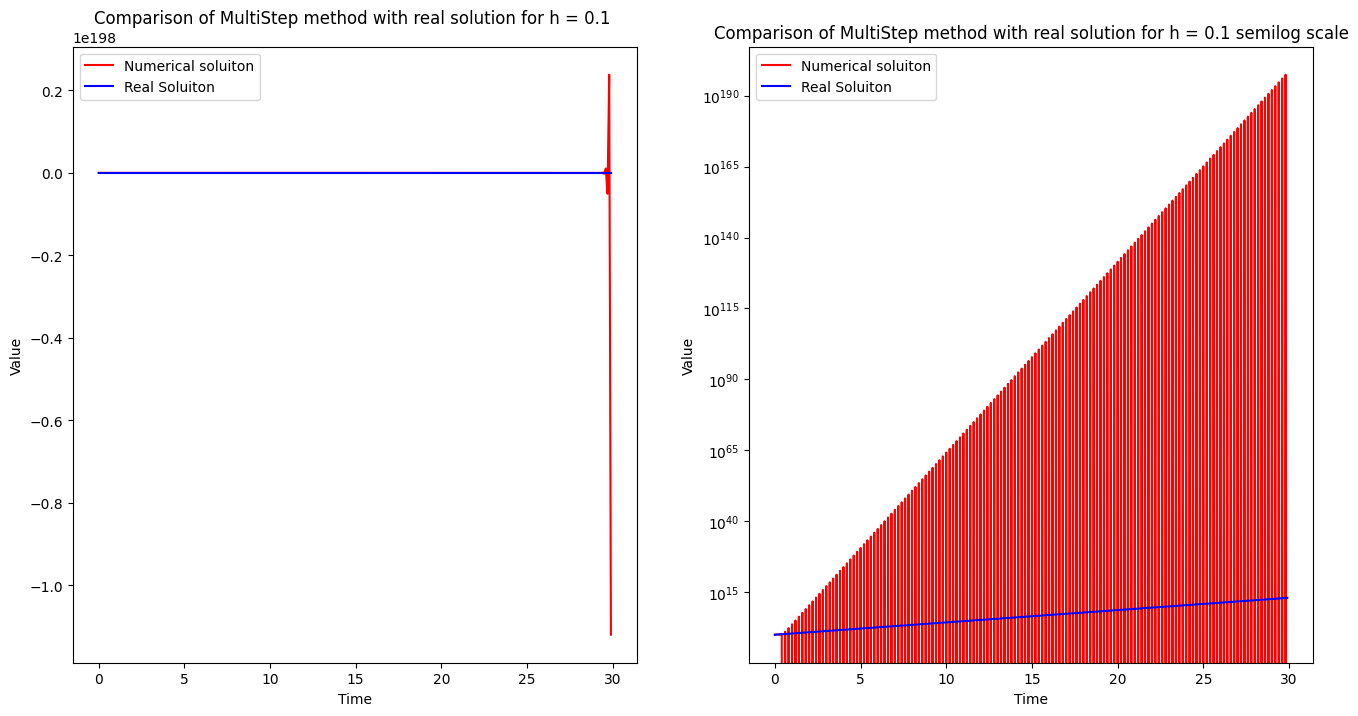

For h = 0.05: sigma1 = 1.05127091267474, sigma2 = -4.85127091267474
0.999784683834127 0.000215316165873124


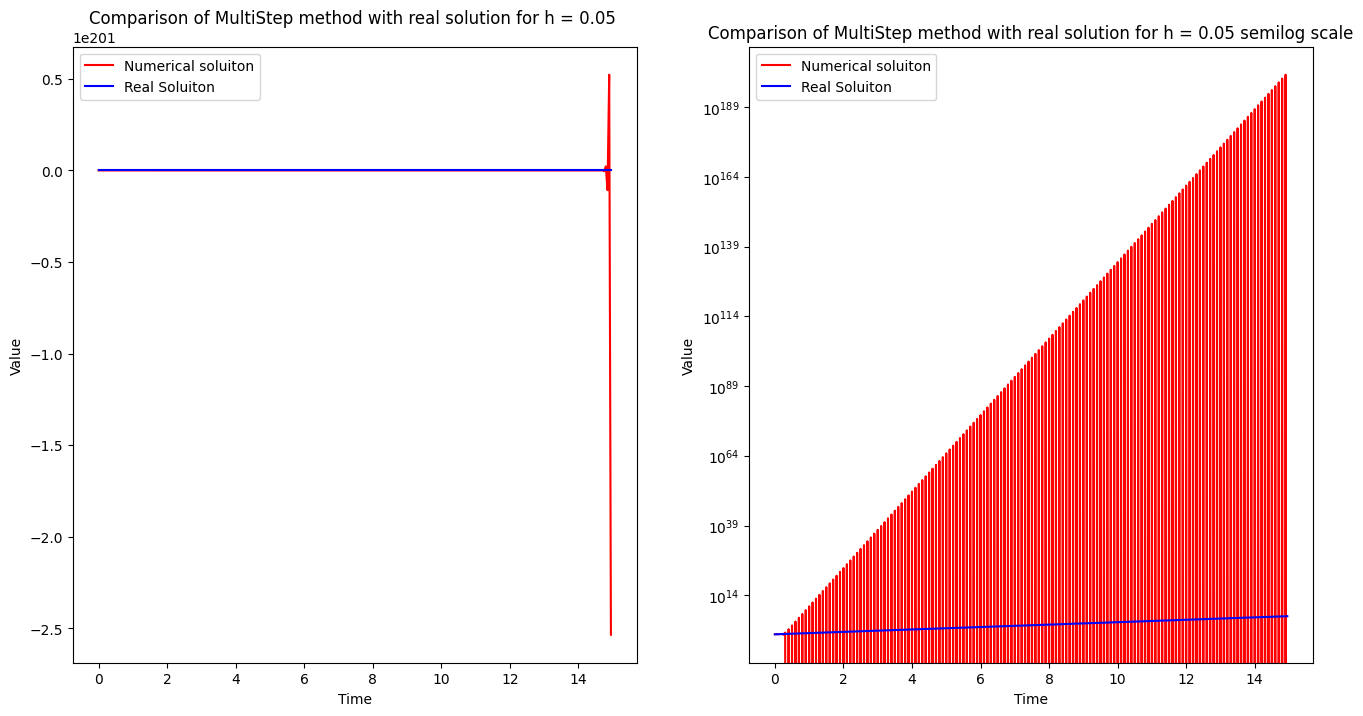

For h = 0.025: sigma1 = 1.02531510936237, sigma2 = -4.92531510936237
0.999947046052134 5.29539478656313e-5


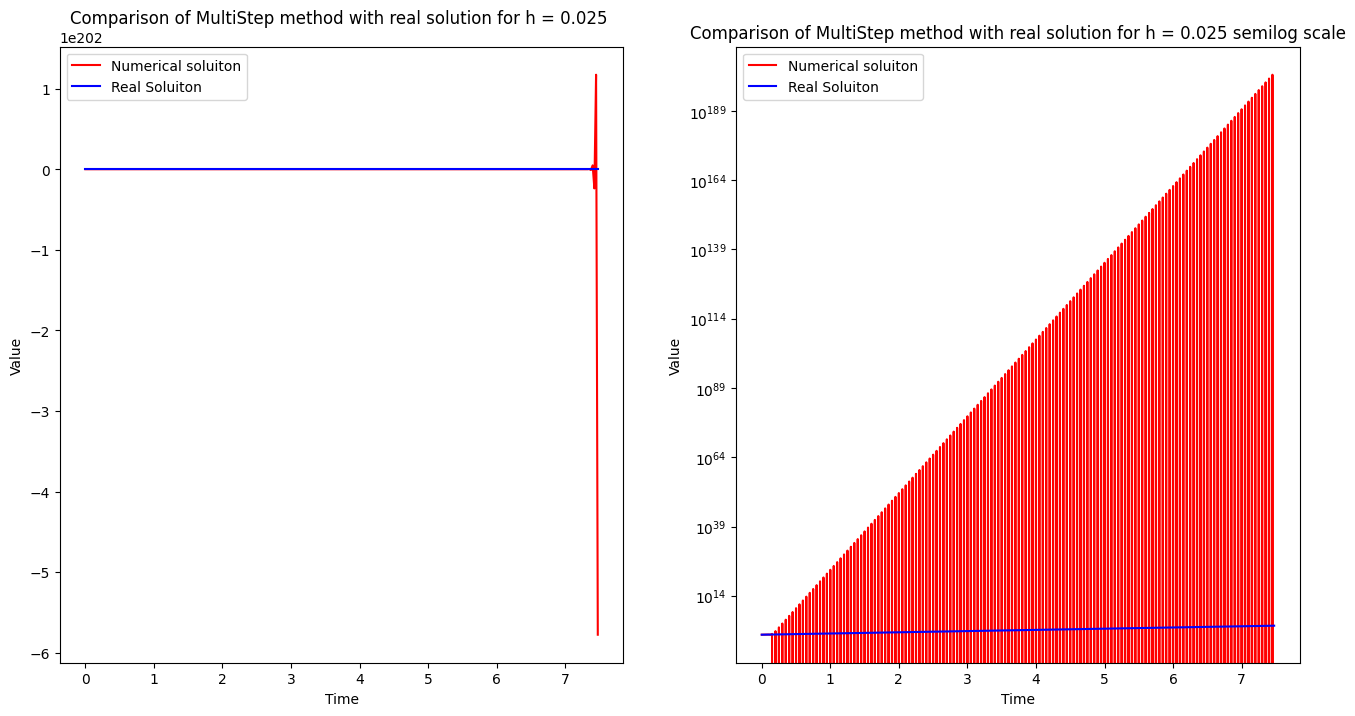

In [22]:
hs = [1/10,1/20,1/40]

for h in hs: 
    s1 = sigma1
    s2 =sigma2
    s1 = s1.subs([(hl,h)])
    s2 = s2.subs([(hl,h)])
    print(f'For h = {h}: sigma1 = {s1}, sigma2 = {s2}')

    eq1 = sympy.Eq(c1+c2,1)
    eq2 = sympy.Eq(c1*s1+c2*s2,1+h)
    const_coeffs = sympy.solve([eq1,eq2],[c1,c2])
    print(const_coeffs[c1],const_coeffs[c2])
    y = []
    time_steps = np.arange(0,30*h/0.1,h)
    y_real = []
    for n,t in enumerate(time_steps):
        y.append(multistep(n,const_coeffs,s1,s2))
        y_real.append(np.exp(t))
    fig,axes = plt.subplots(1,2, figsize = (16,8))
    axes[0].plot(time_steps,y,color='red',label = 'Numerical soluiton')
    axes[0].plot(time_steps,y_real,color='blue',label = 'Real Soluiton')
    axes[0].legend()
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Value')
    axes[0].set_title(f'Comparison of MultiStep method with real solution for h = {h} ')
    axes[1].semilogy(time_steps,y,color='red',label = 'Numerical soluiton')
    axes[1].semilogy(time_steps,y_real,color='blue',label = 'Real Soluiton')
    axes[1].legend()
    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Value')
    axes[1].set_title(f'Comparison of MultiStep method with real solution for h = {h} semilog scale')
    plt.show()

# Problem 4

\begin{equation*}
    \begin{cases}
        \frac{dr}{dt} = 2r - \alpha rf, r(0) = r_0\\
        \frac{df}{dt} = -f + \alpha r f, f(0) = f_0
    \end{cases}
\end{equation*}
$\alpha = 0.01$

In [23]:
def rhs1(r,f,alpha=0.01):
    return 2*r - alpha*r*f
def rhs2(r,f,alpha=0.01):
    return -f + alpha*r*f

In [24]:
def adams_bashforth(h,r2,f2,r1,f1,alpha = 0.01):
    return [r2 + 0.5*h*(3*rhs1(r2,f2,alpha) - rhs1(r1,f1,alpha)), f2 + 0.5*h*(3*rhs2(r2,f2,alpha) - rhs2(r1,f1,alpha)) ]

In [25]:
def leapfrog(h,r2,f2,r1,f1,alpha = 0.01):
    return [r1 + 2*h*rhs1(r2,f2,alpha),f1+2*h*rhs2(r2,f2,alpha)]

In [26]:
def explicit_euler(h,r,f,alpha=0.01):
    return [r + h*rhs1(r,f,alpha), f + h*rhs2(r,f,alpha)]

In [27]:
def runge_kutta(h,r,f,alpha=0.01):
        k1r = h*rhs1(r,f,alpha)
        k1f = h*rhs2(r,f,alpha)
        k2r = h*rhs1(r+0.5*k1r,f+0.5*k1f,alpha)
        k2f = h*rhs2(r+0.5*k1r,f+0.5*k1f,alpha)
        return [r + k2r,f+k2f]

In [28]:
def do(h,r0=300,f0=150,start_function = explicit_euler, calc_function = leapfrog,time_int = 25):
    if start_function == explicit_euler:
        start_name = 'Explicit Euler'
    else:
        start_name = 'Runge-Kutta 2nd order'
    if calc_function == adams_bashforth:
        calc_name = 'Adams-Bashforth method'
    else:
        calc_name = 'Leapfrog method'
    alpha = 0.01
    r = []
    f = []
    r.append(r0)
    f.append(f0)
    t = np.arange(0,time_int,h)
    (r1,f1) = start_function(h,r[0],f[0],alpha)
    r.append(r1)
    f.append(f1)
    for i in t[2:]:
        (r_,f_) = calc_function(h,r[-1],f[-1],r[-2],f[-2],alpha)
        r.append(r_)
        f.append(f_)
    fig, axes = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('For ' + calc_name +' with start function: '+start_name)
    axes[0].plot(t, r, 'r', label="Rabit population")
    axes[0].plot(t,f,'b',label='Fox population')
    axes[0].set_title(fr'Population for h={h}, $r_0$ = {r0}, $f_0$ = {f0}')
    axes[0].legend()
    axes[1].plot(r,f,'b',label='f')
    axes[1].set_title(fr'Graph for Rabit vs Fox population for h = {h},$r_0$ = {r0}, $f_0$ = {f0}')
    axes[1].legend()
    axes[0].set_xlabel('Time')
    axes[1].set_xlabel('Rabits')
    axes[0].set_ylabel('Amount')
    axes[1].set_ylabel('Foxes')
    axes[0].grid()
    axes[1].grid()

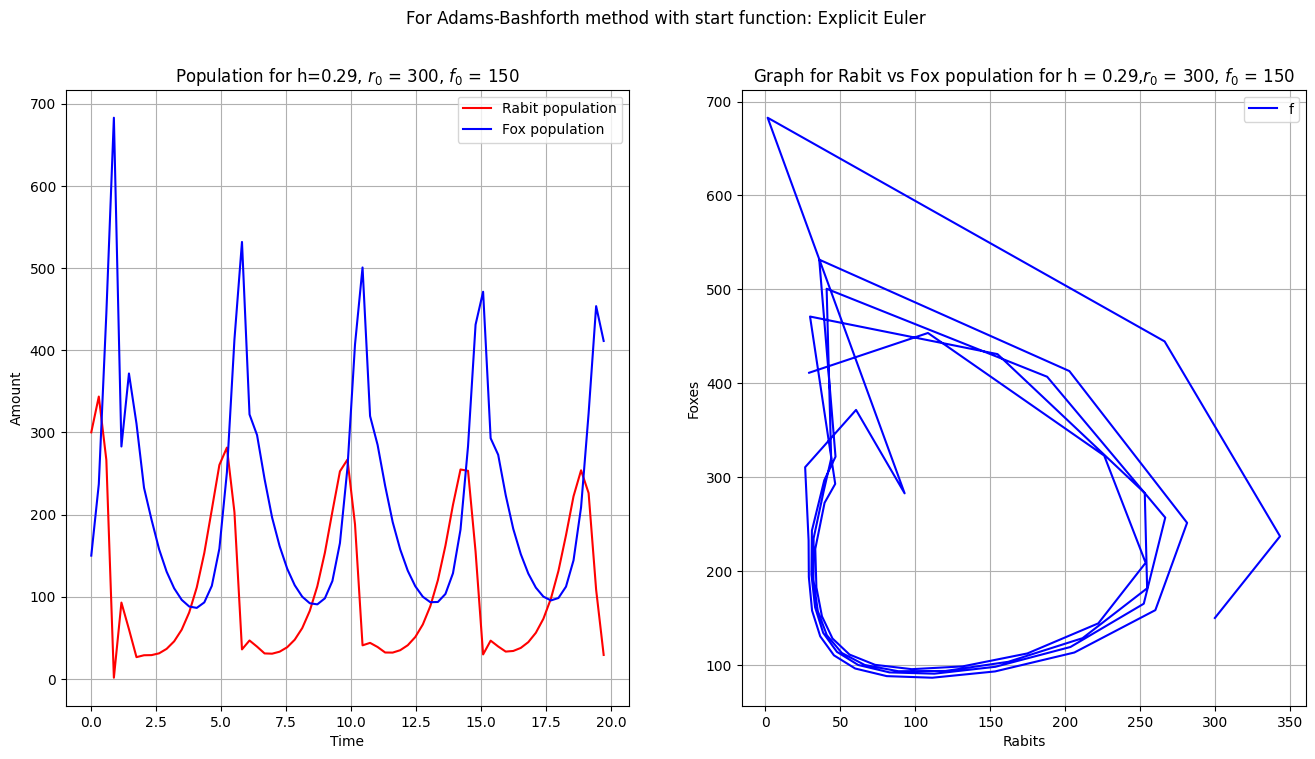

In [29]:
do(0.29,300,150,explicit_euler,adams_bashforth,time_int=20)

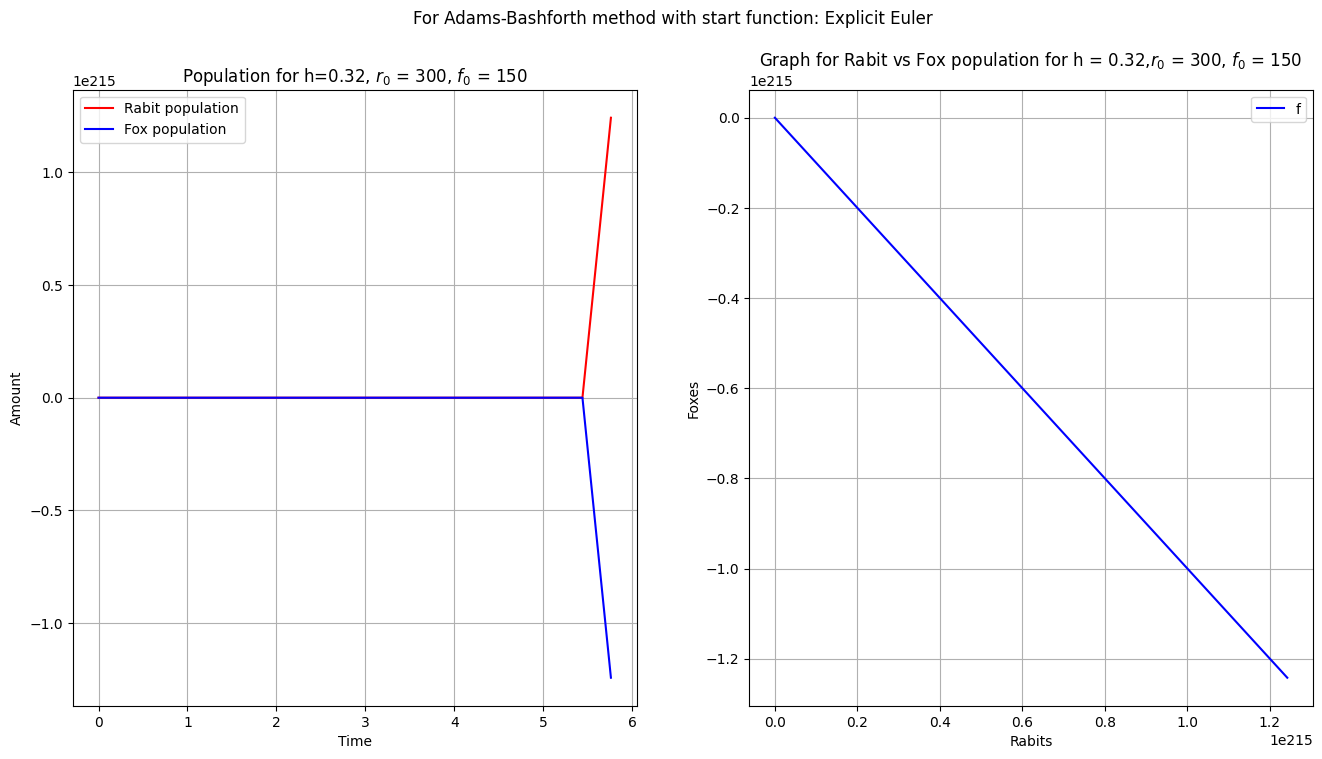

In [30]:
do(0.32,300,150,explicit_euler,adams_bashforth,time_int=20)

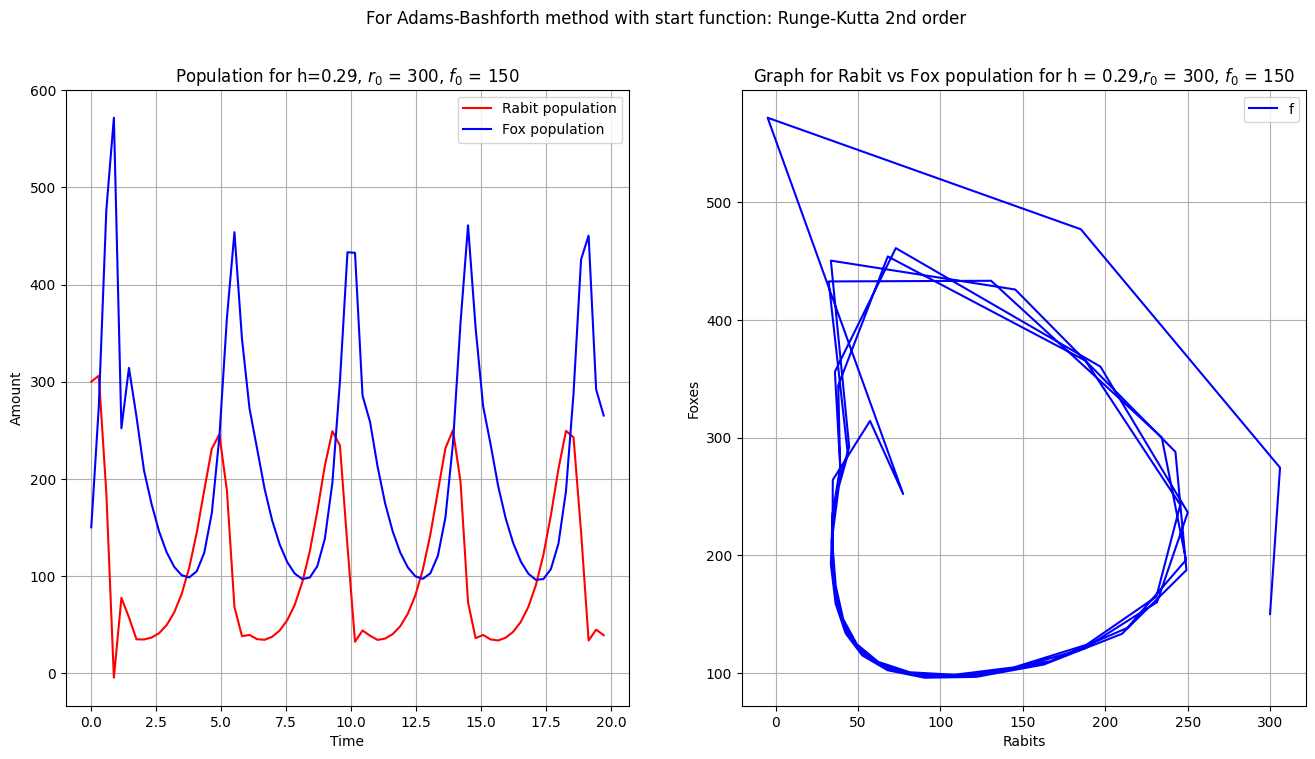

In [31]:
do(0.29,300,150,runge_kutta,adams_bashforth,time_int=20)

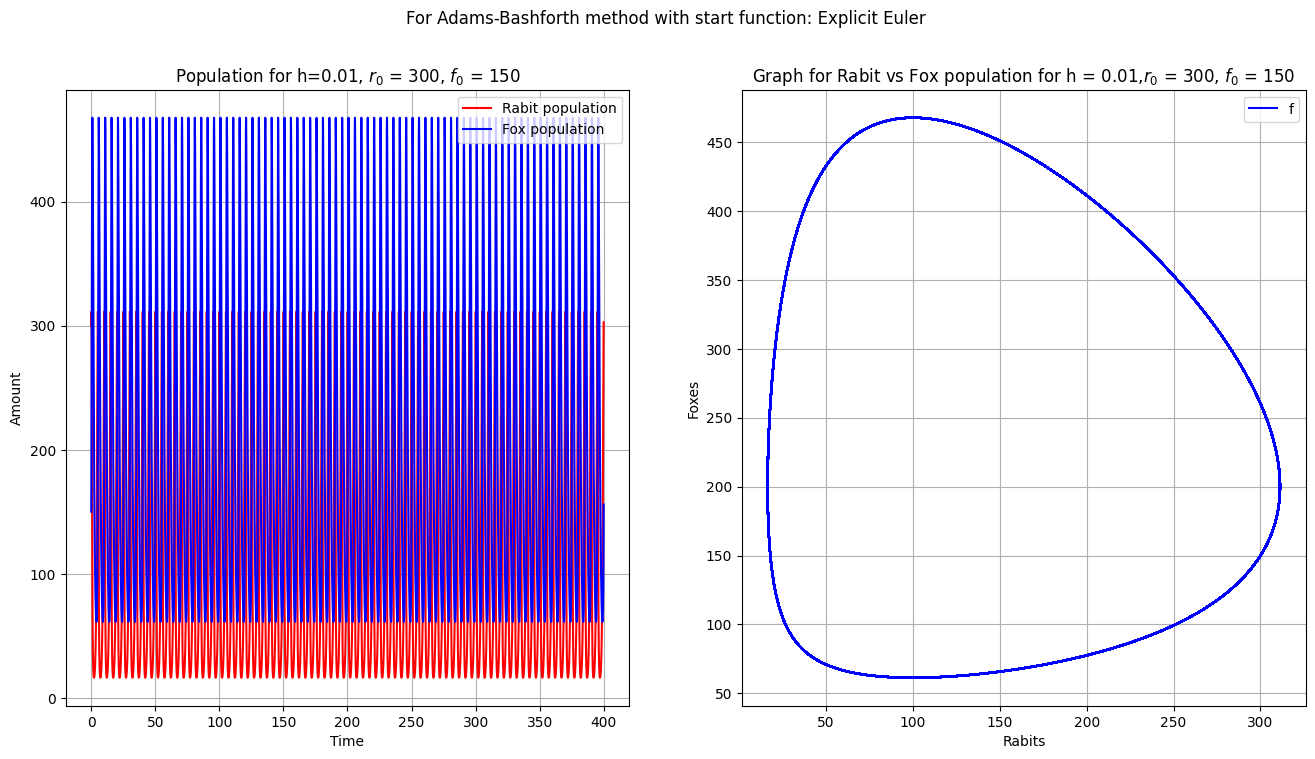

In [32]:
do(0.01,300,150,explicit_euler,adams_bashforth,time_int=400)

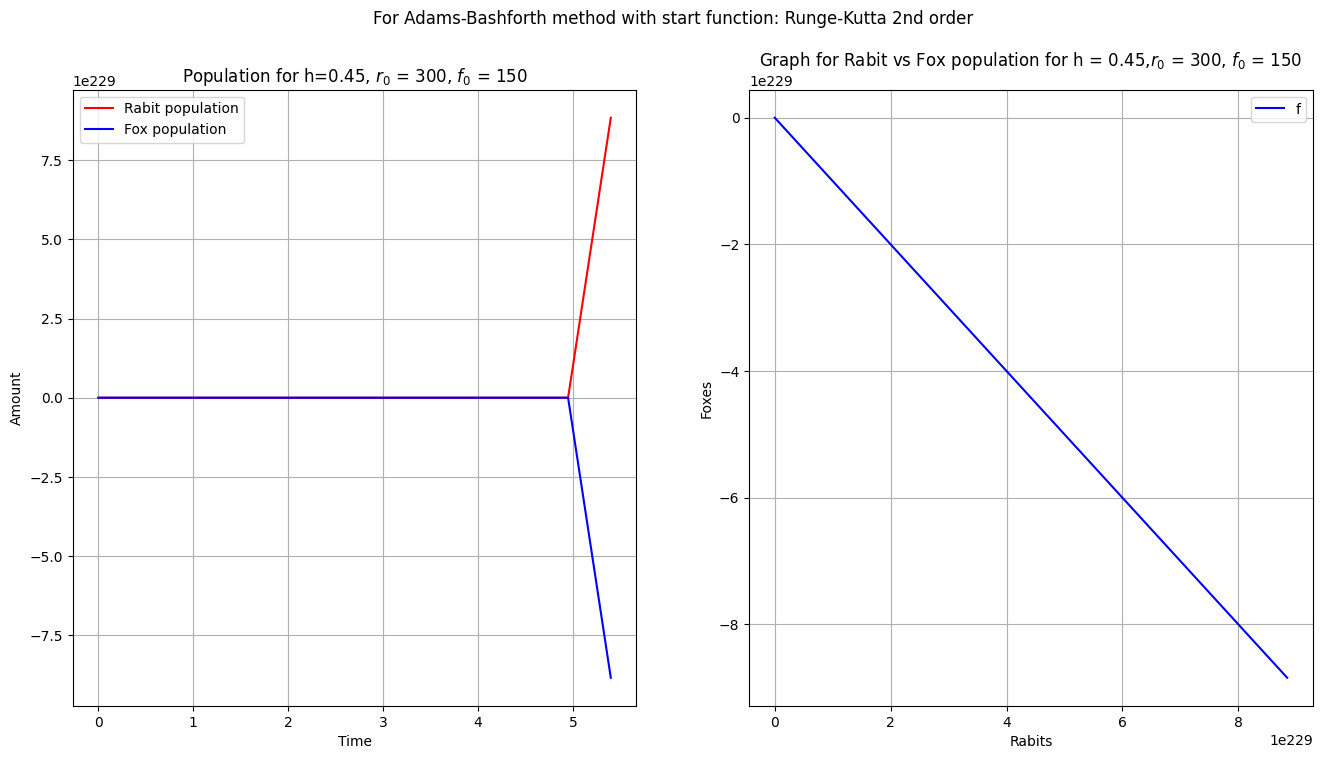

In [33]:
do(0.45,300,150,runge_kutta,adams_bashforth)

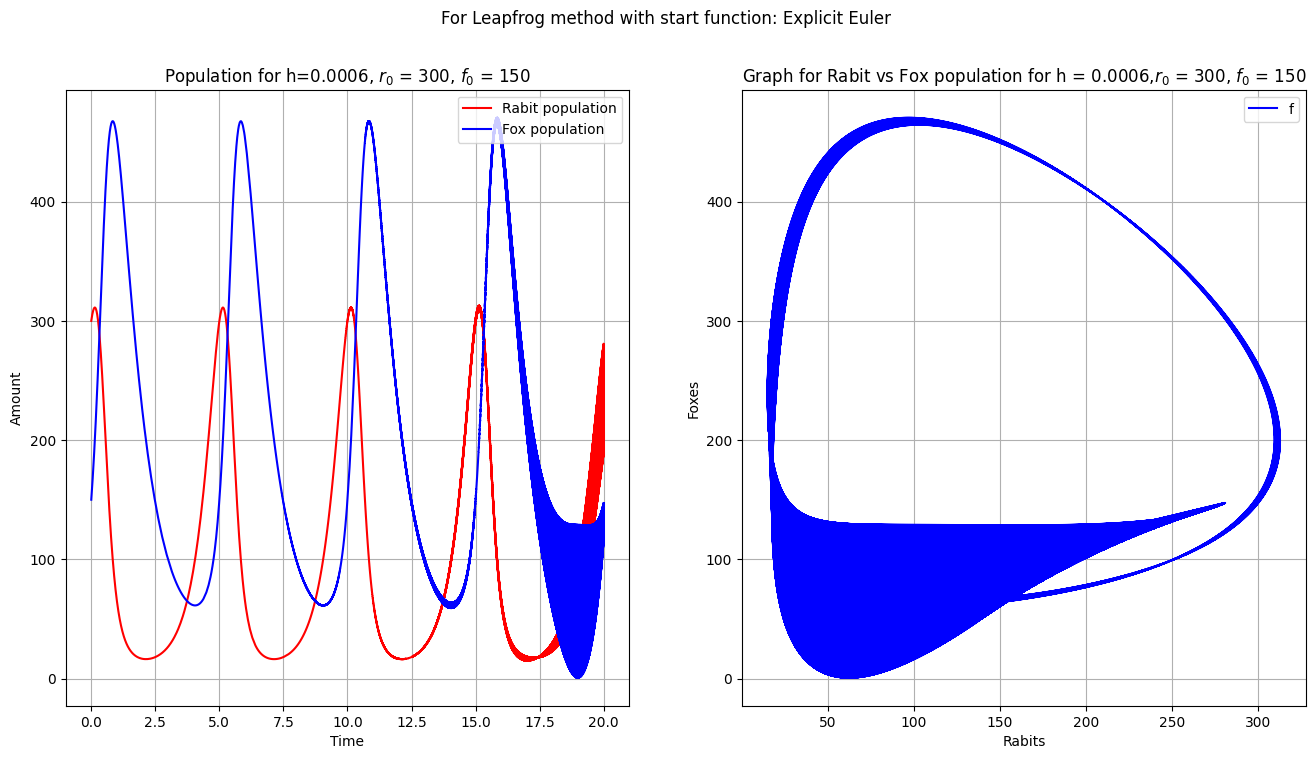

In [34]:
do(0.0006,300,150,explicit_euler,leapfrog,time_int=20)

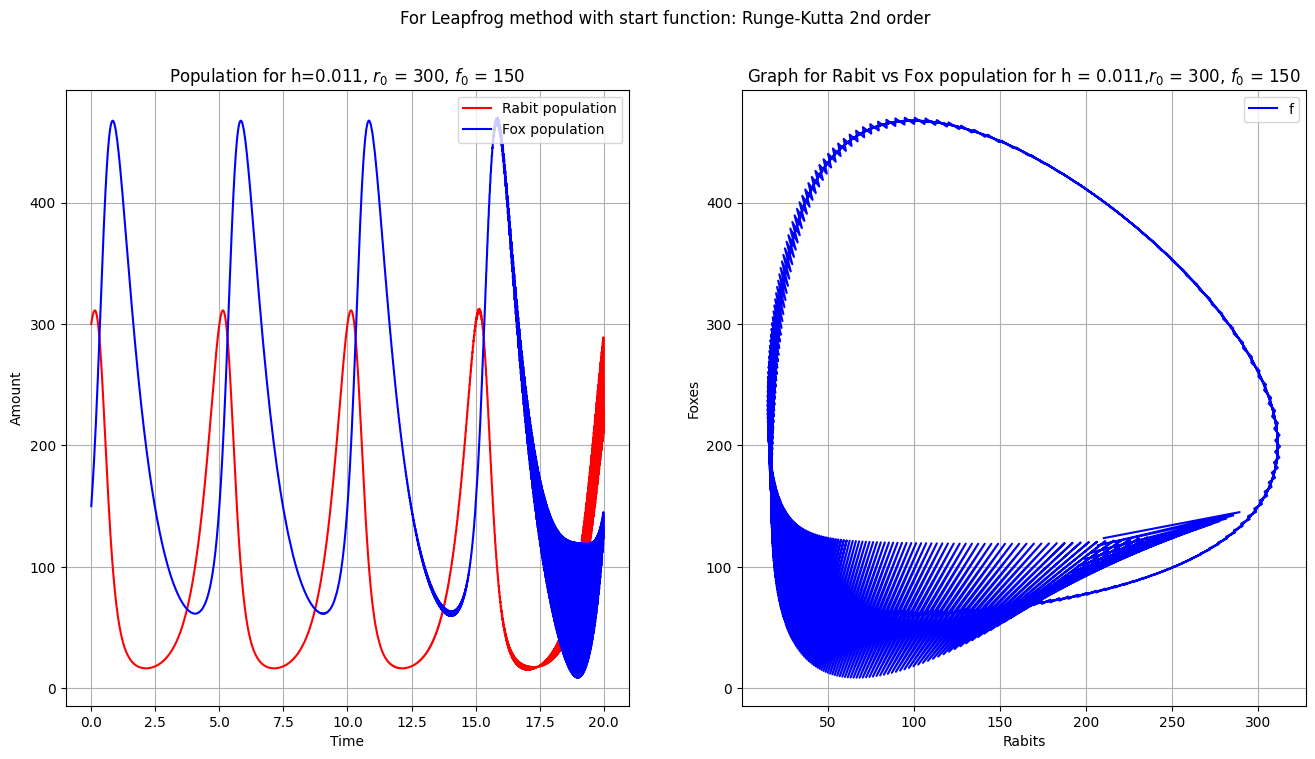

In [35]:
do(0.011,300,150,runge_kutta,leapfrog,time_int=20)

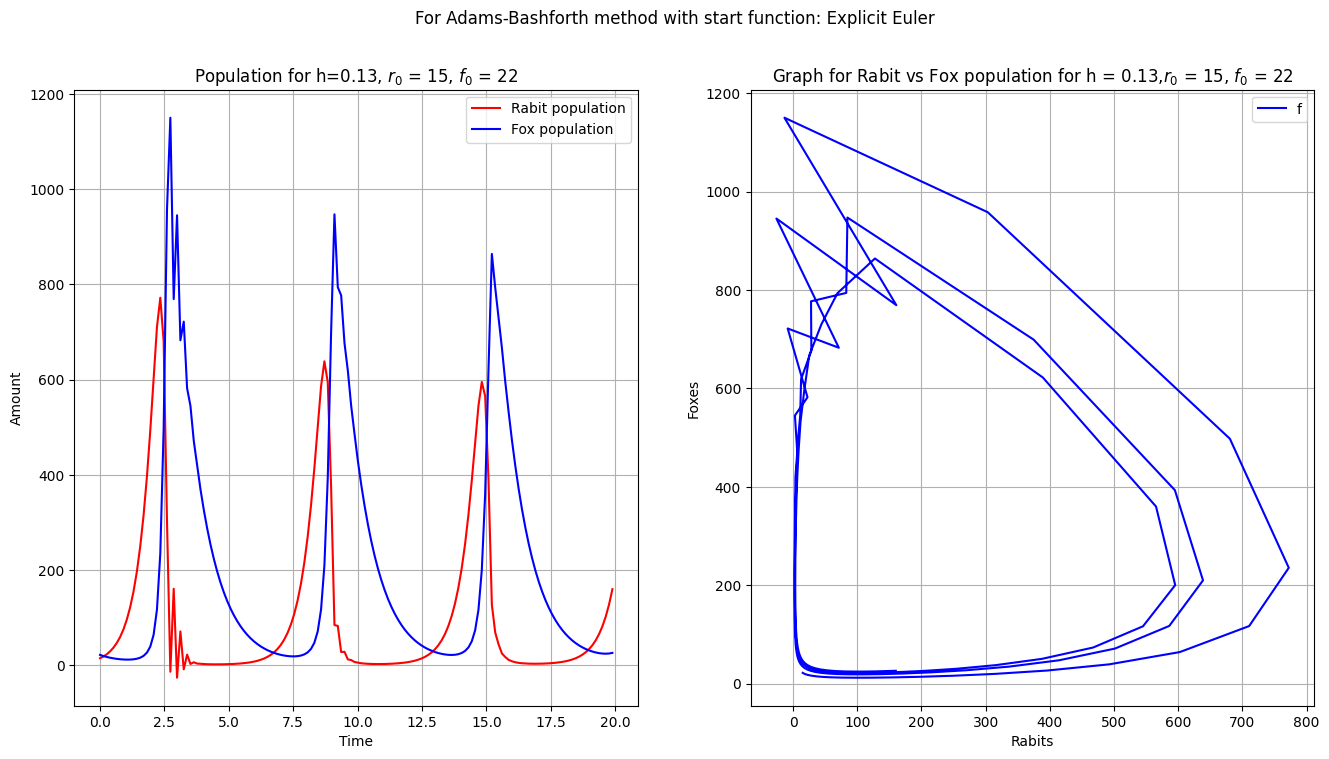

In [36]:
do(0.13,15,22,explicit_euler,adams_bashforth,time_int=20)

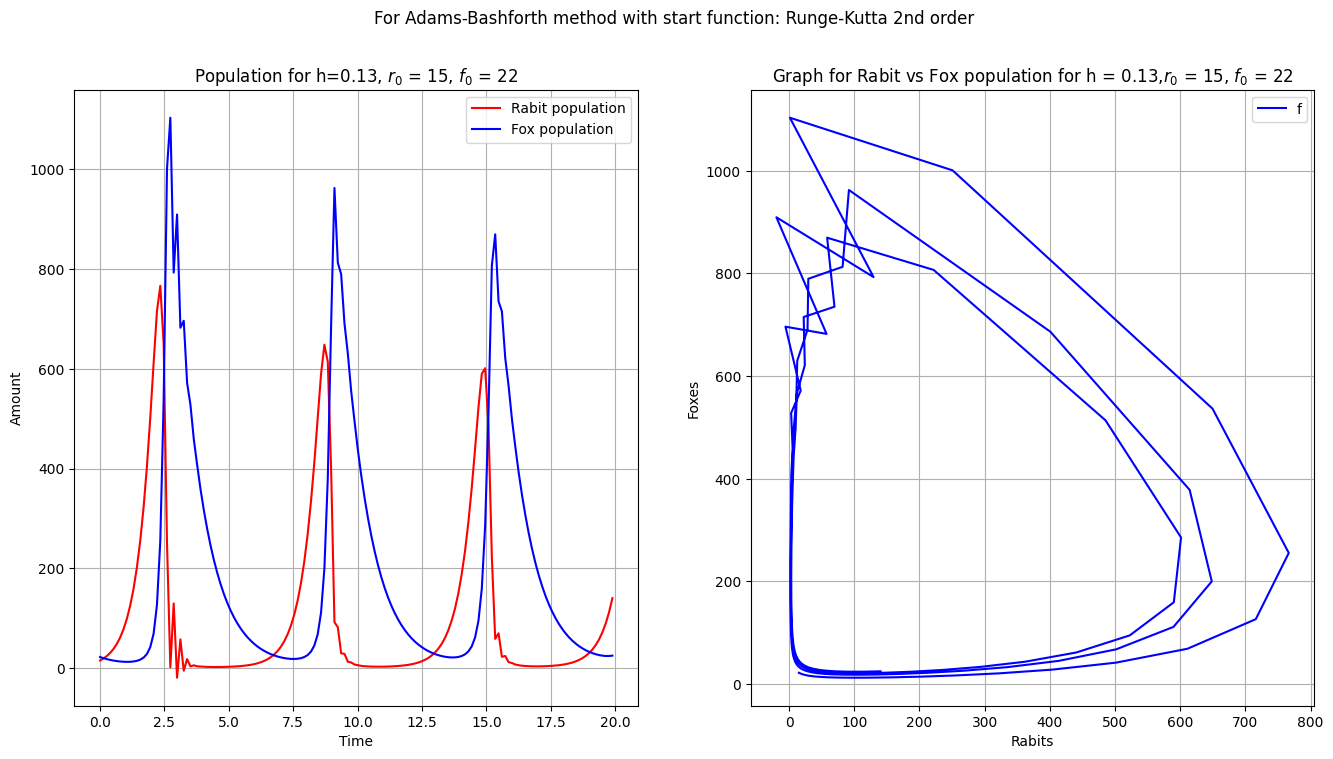

In [37]:
do(0.13,15,22,runge_kutta,adams_bashforth,time_int=20)

/Users/zhd/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/zhd/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


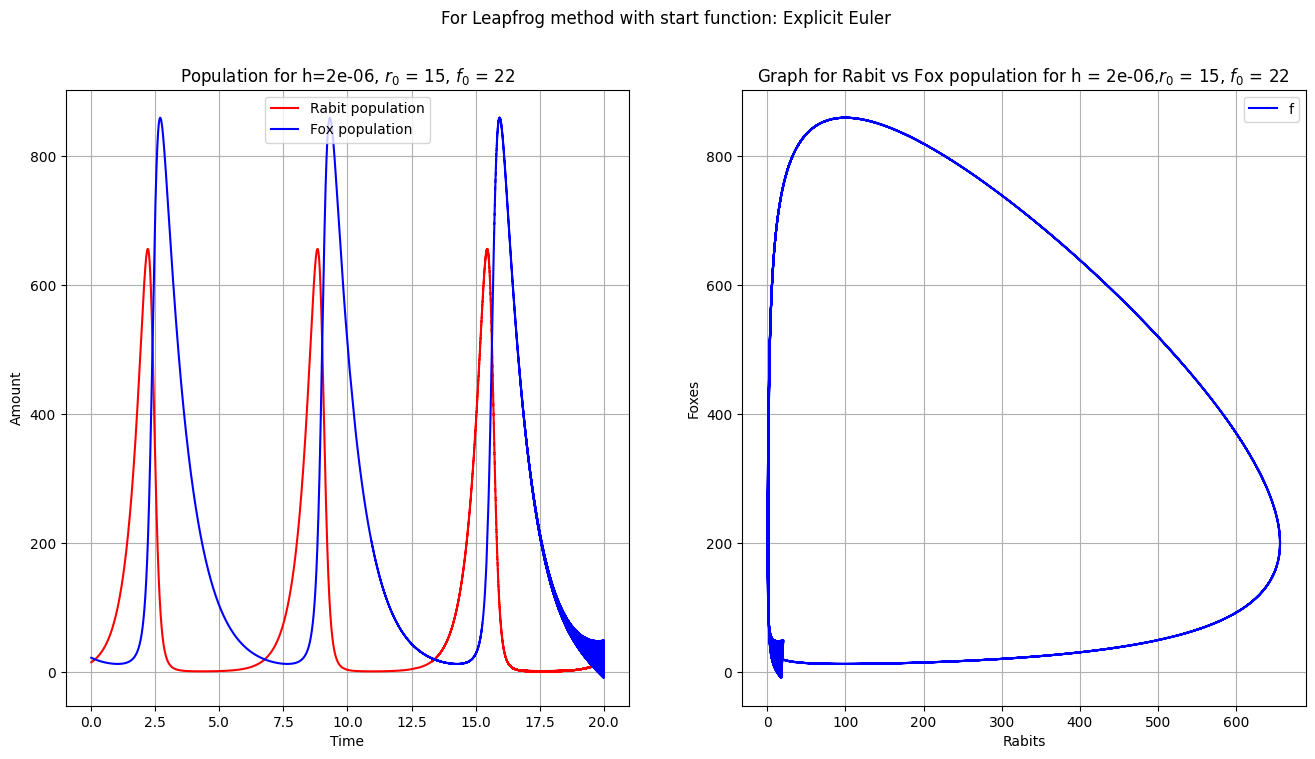

In [38]:
do(0.000002,15,22,explicit_euler,leapfrog,time_int=20)

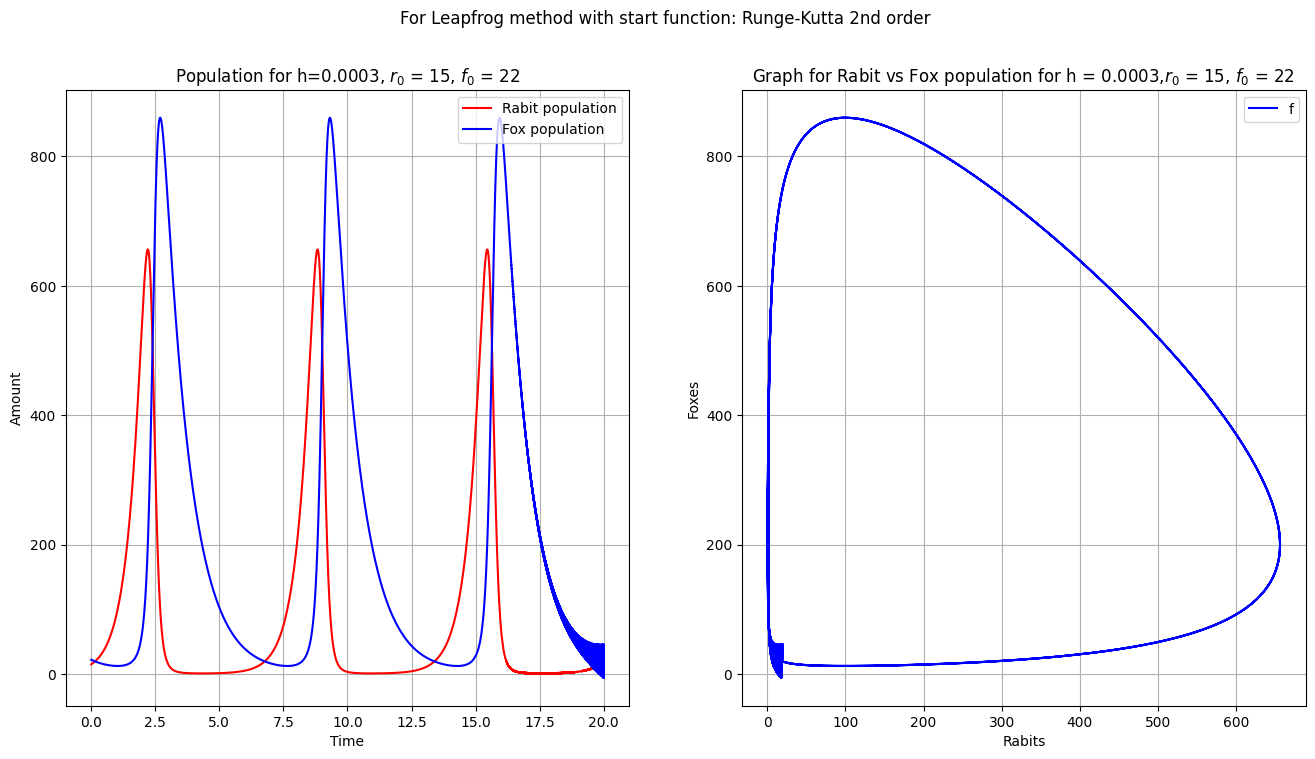

In [39]:
do(0.0003,15,22,runge_kutta,leapfrog,time_int=20)

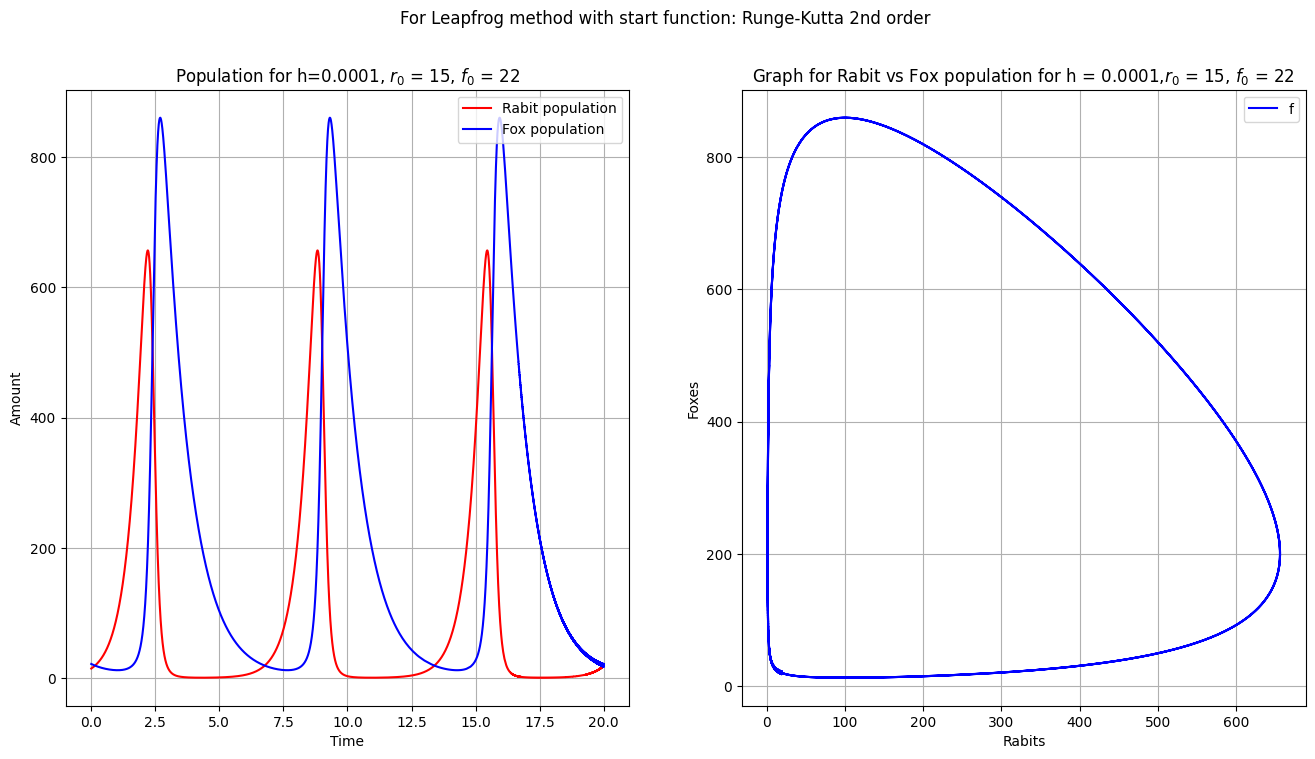

In [40]:
do(0.0001,15,22,runge_kutta,leapfrog,time_int=20)

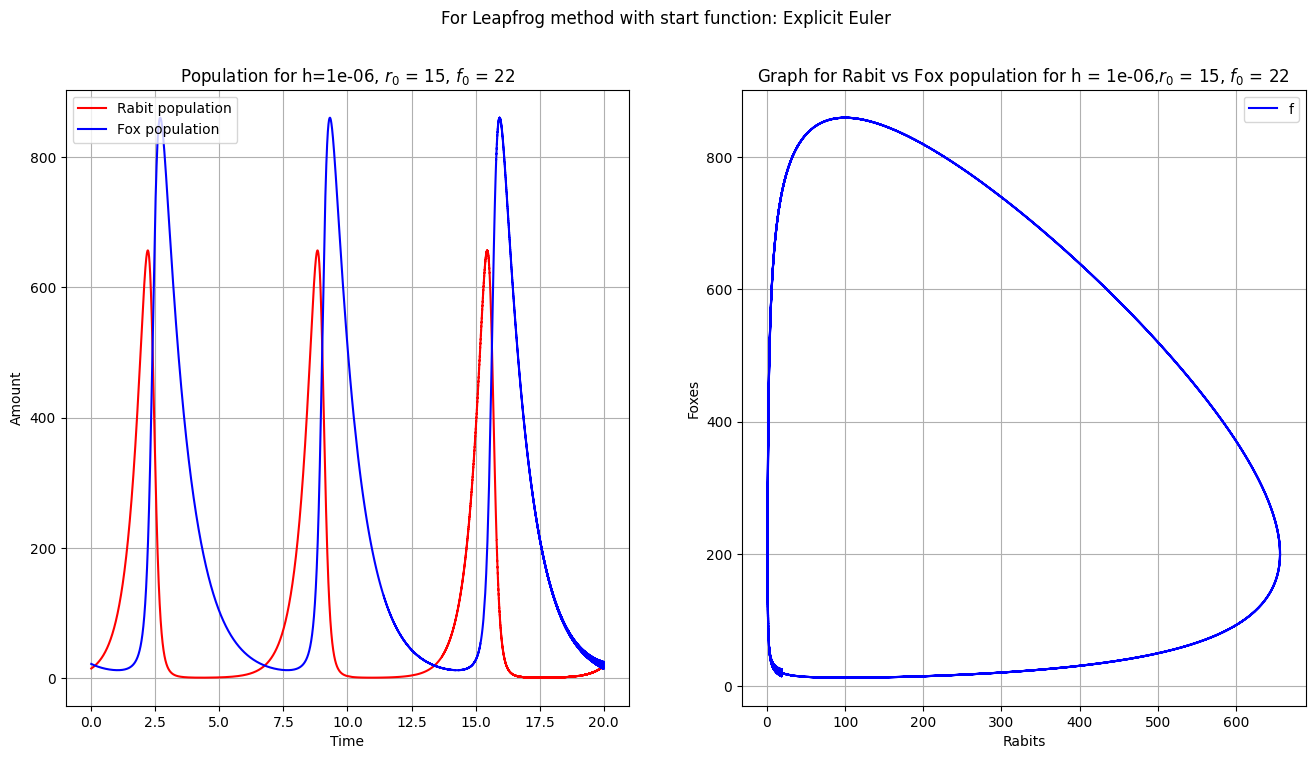

In [41]:
do(0.000001,15,22,explicit_euler,leapfrog,time_int=20)

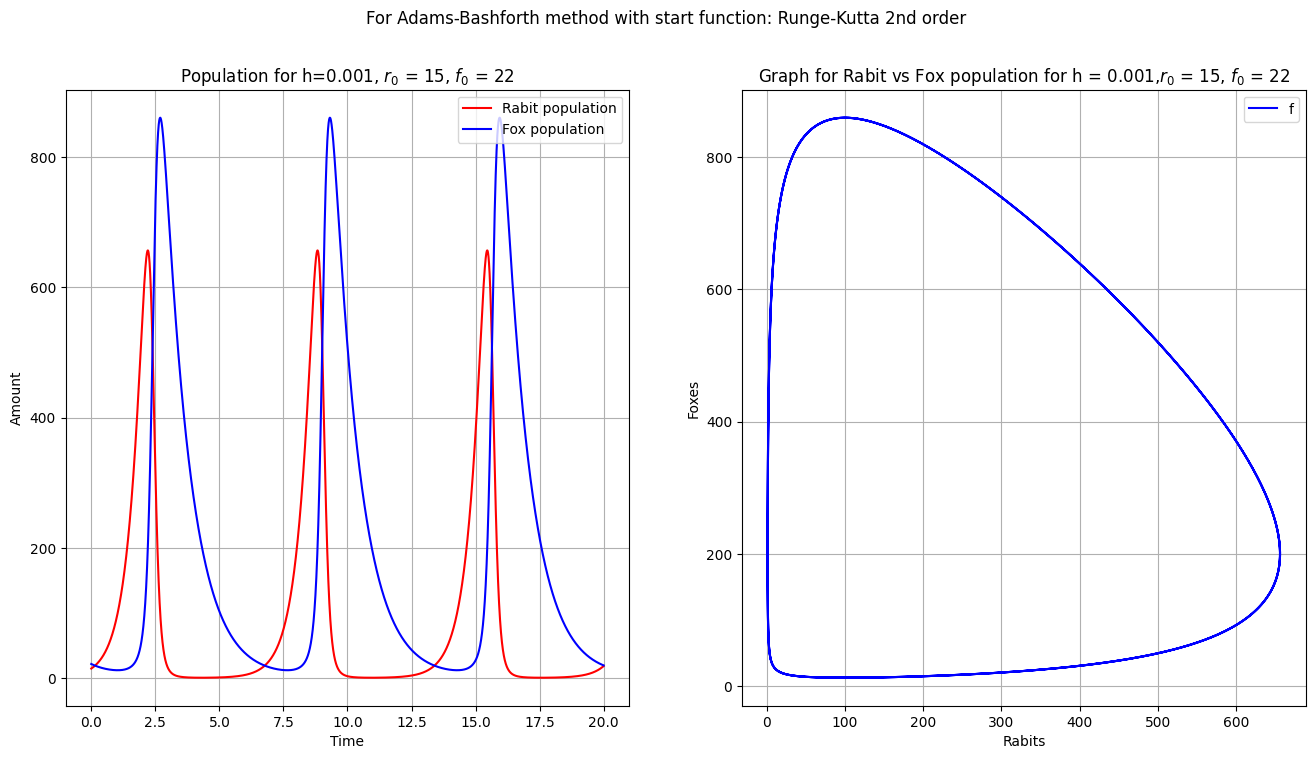

In [42]:
do(0.001,15,22,runge_kutta,adams_bashforth,time_int=20)

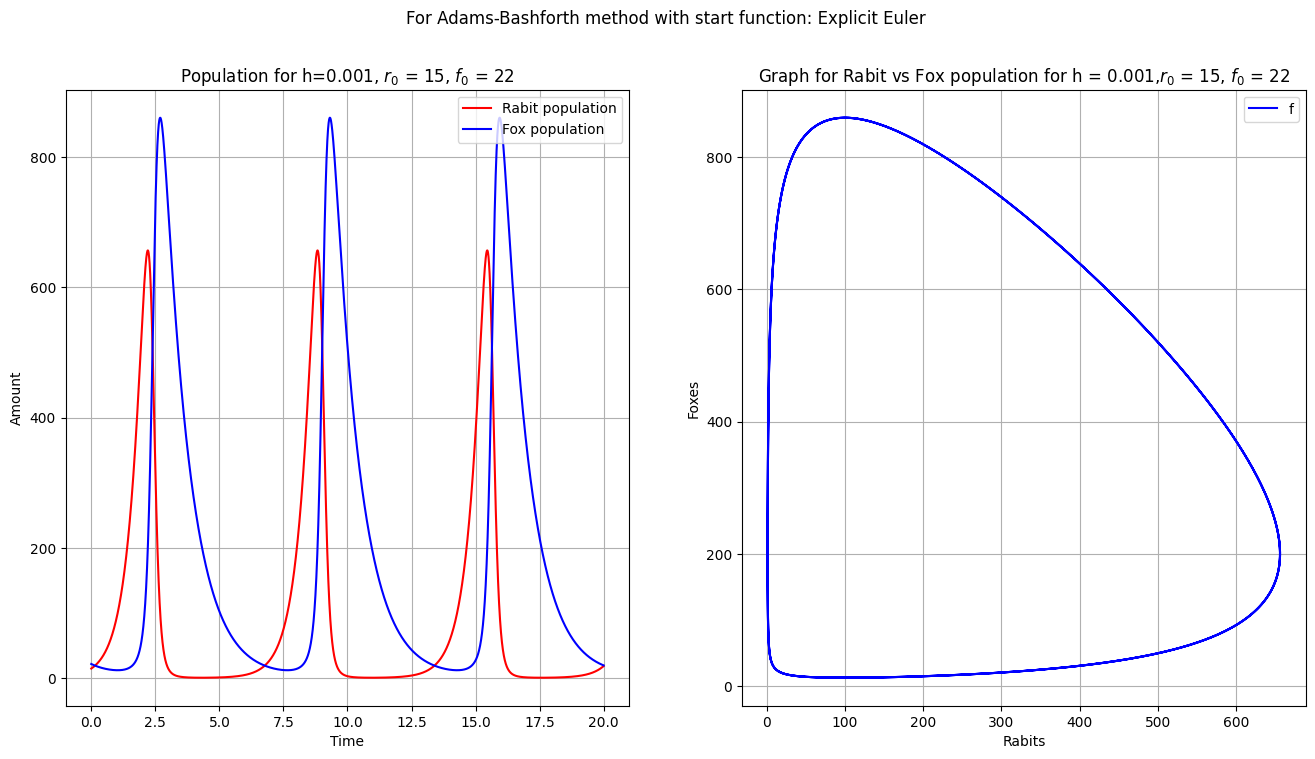

In [43]:
do(0.001,15,22,explicit_euler,adams_bashforth,time_int=20)

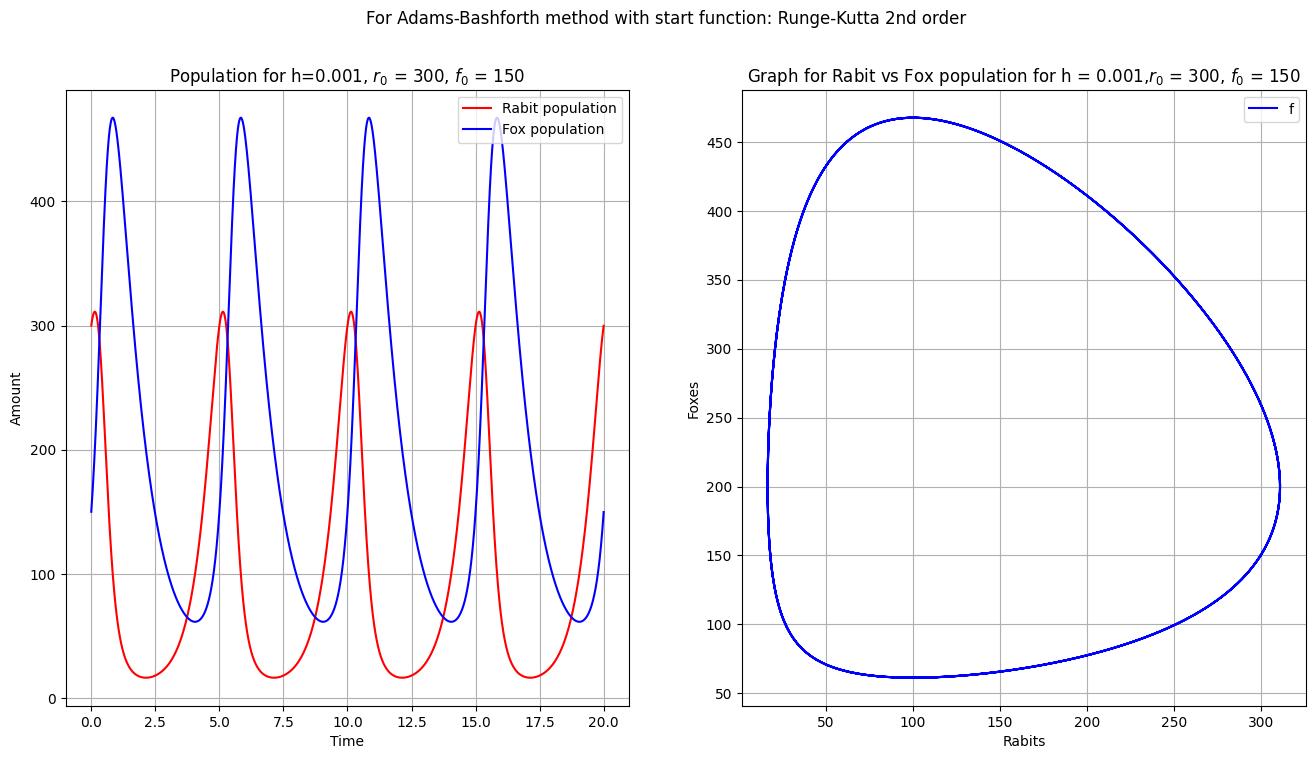

In [44]:
do(0.001,300,150,runge_kutta,adams_bashforth,time_int=20)

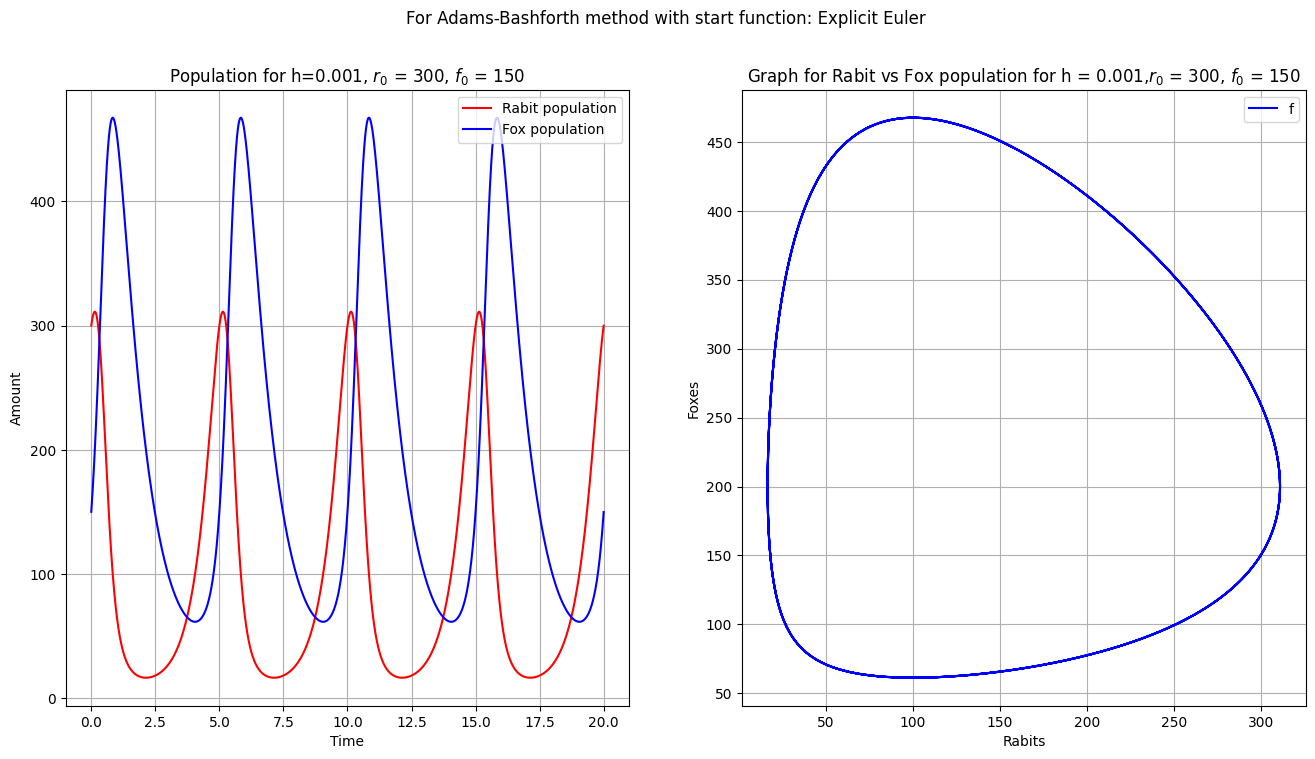

In [45]:
do(0.001,300,150,explicit_euler,adams_bashforth,time_int=20)

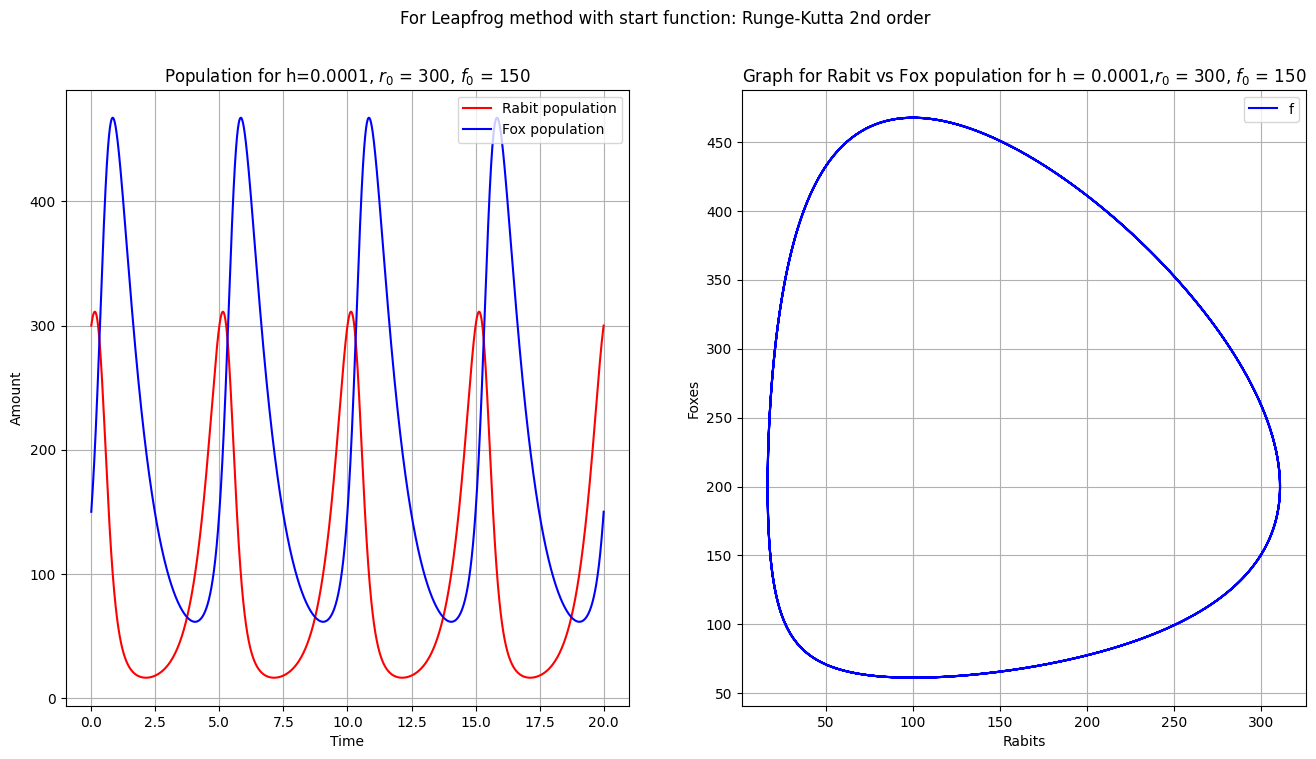

In [46]:
do(0.0001,300,150,runge_kutta,leapfrog,time_int=20)

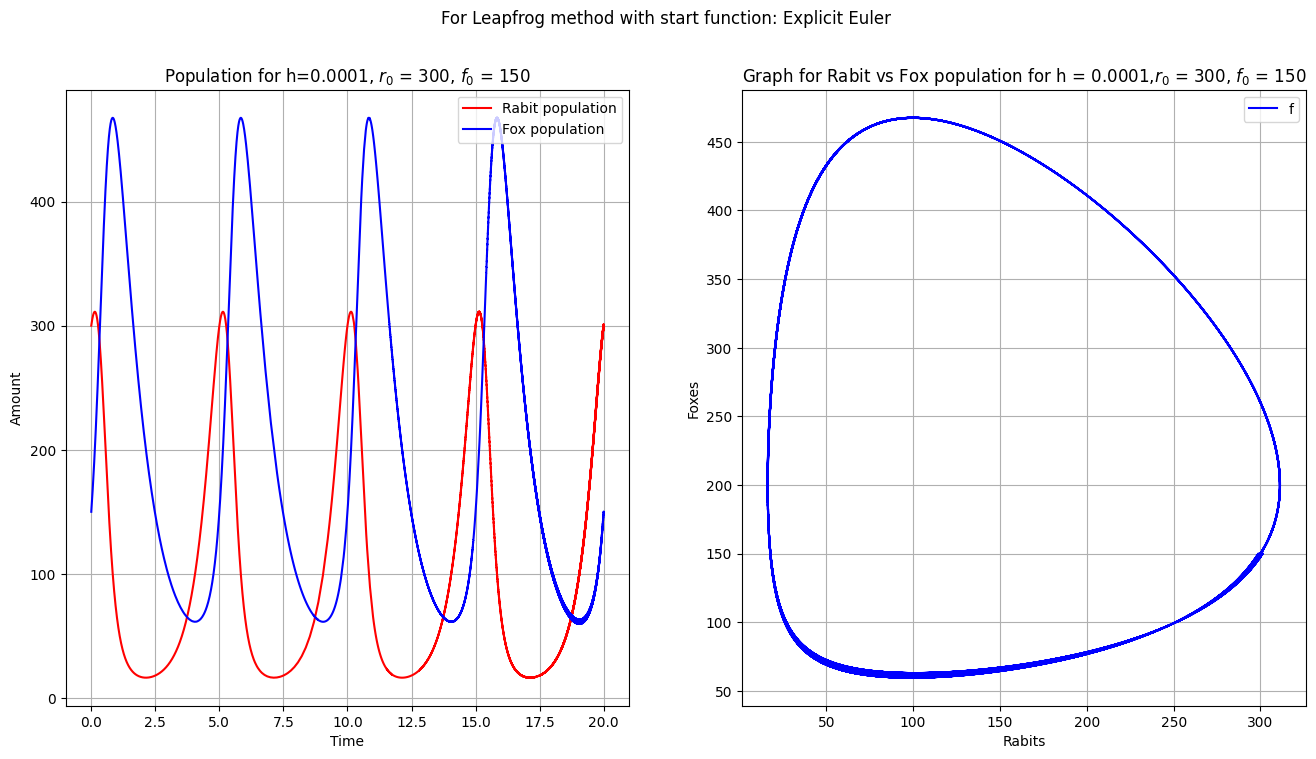

In [47]:
do(0.0001,300,150,explicit_euler,leapfrog,time_int=20)

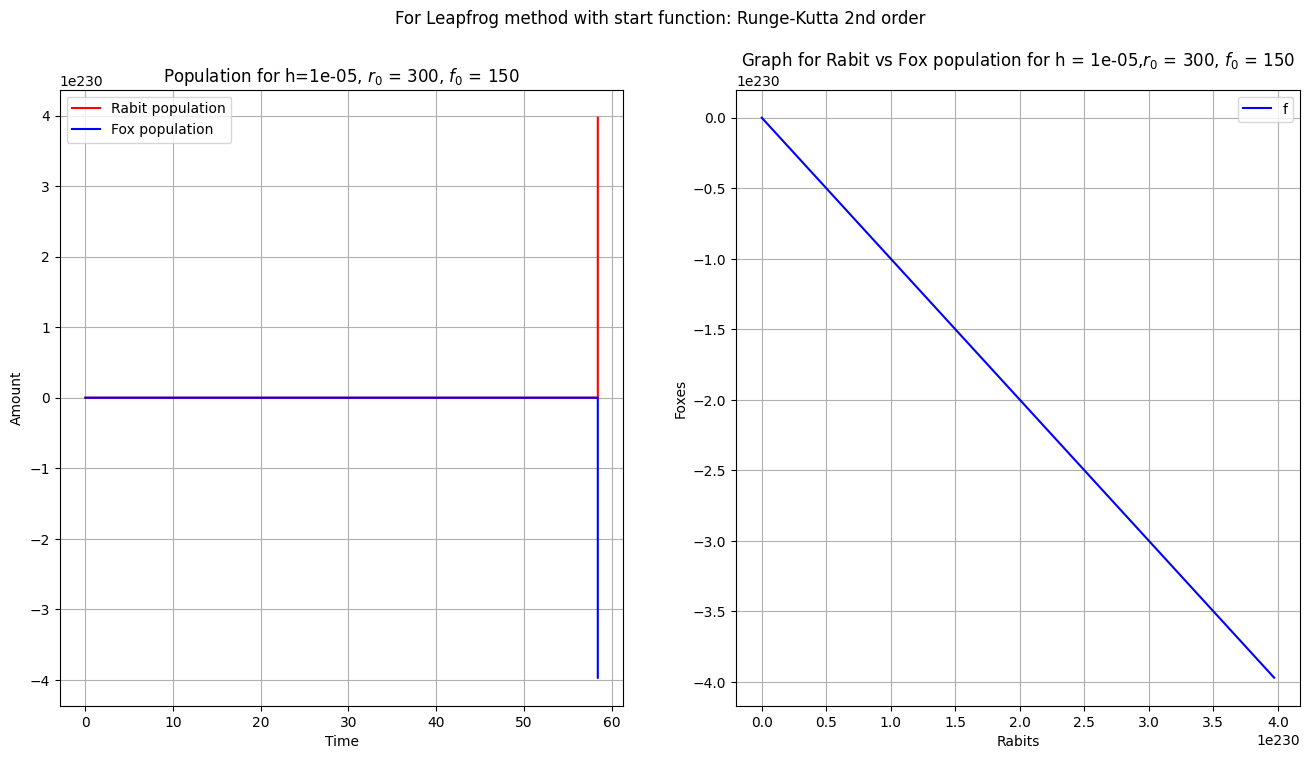

In [48]:
do(0.00001,300,150,runge_kutta,leapfrog,time_int=100)

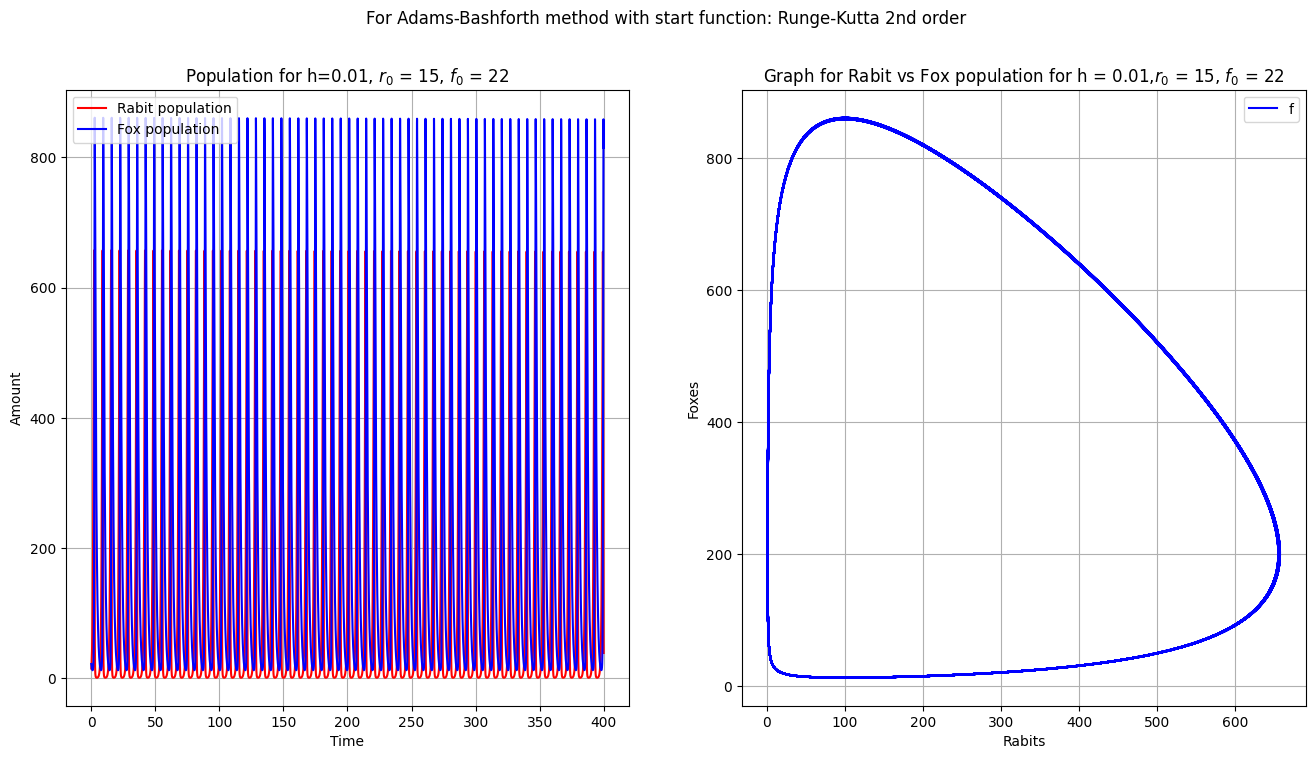

In [49]:
do(0.01,15,22,runge_kutta,adams_bashforth,time_int=400)

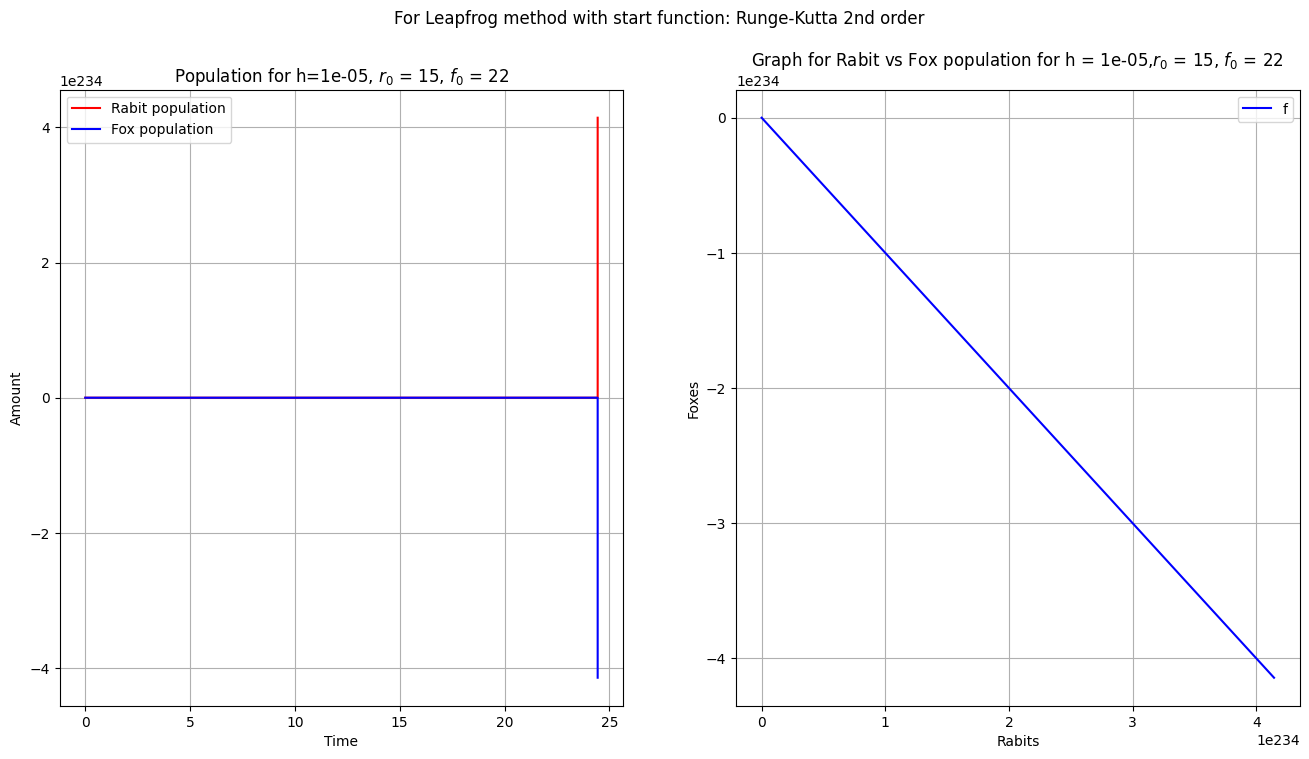

In [50]:
do(0.00001,15,22,runge_kutta,leapfrog,time_int=100)

# Problem 5

$$\frac{d^2x}{dt^2} + \mu \frac{dx}{dt}+ bx + cx^3 = k\cos(\omega t)

\begin{equation*}
    \begin{cases}
        \frac{dx}{dt} = z\\
        \frac{dz}{dt} + \mu z + bx + cx^3 = k\cos(\omega t)
    \end{cases}
    \Leftrightarrow
    \begin{cases}
        \frac{dx}{dt} = z\\
        \frac{dz}{dt} = k\cos(\omega t)- \mu z - bx - cx^3
    \end{cases}
\end{equation*}

In [51]:
(mu,b,c,w,k) = (1,-10,100,3.5,1.55)
def anharmonic(t,x):
    return [x[1],k*np.cos(w*t)-mu*x[1]-b*x[0]-c*x[0]**3]

In [52]:
# Create first and last points of integration
t_start = 0
t_end = 300

In [53]:
# Initial conditions
x_0 = 0
x_1 = 1

In [54]:
t = np.linspace(t_start,t_end,10000000)

In [55]:
t[1] -t[0]

3.00000030000003e-05

In [56]:
# Integrate using solve_ivp
solution = solve_ivp(anharmonic, (t_start, t_end),[x_0, x_1],t_eval = t,method='RK45',dense_output=True)

Text(0.5, 1.0, "Solution of anharmonic equation, initial values x(0) = 0, x'(0) = 1")

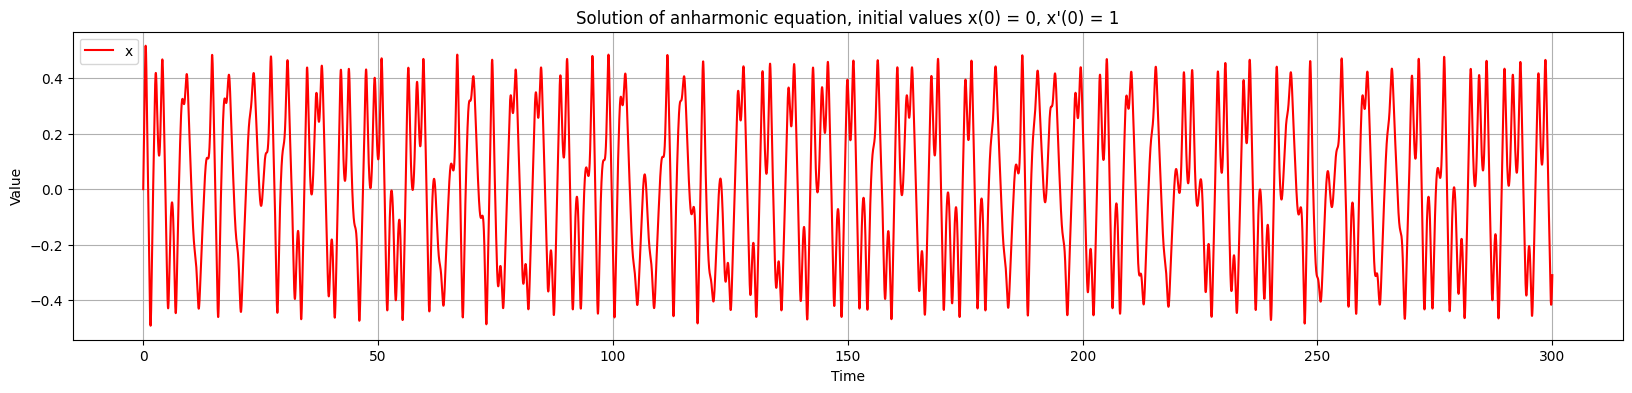

In [57]:
fig, axes = plt.subplots(1,1, figsize=(20,4))
axes.plot(solution.t, solution.y[0], 'r', label="x")
axes.legend(loc = 'upper left')
axes.grid()
axes.set_xlabel('Time')
axes.set_ylabel('Value')
axes.set_title('Solution of anharmonic equation, initial values x(0) = 0, x\'(0) = 1')

In [58]:
k = 0
ind = []
for i in range(len(t)):
    if abs(t[i] - 2*np.pi*k/w)<1e-4:
        ind.append(i)
        k+=1

Text(0, 0.5, "x'")

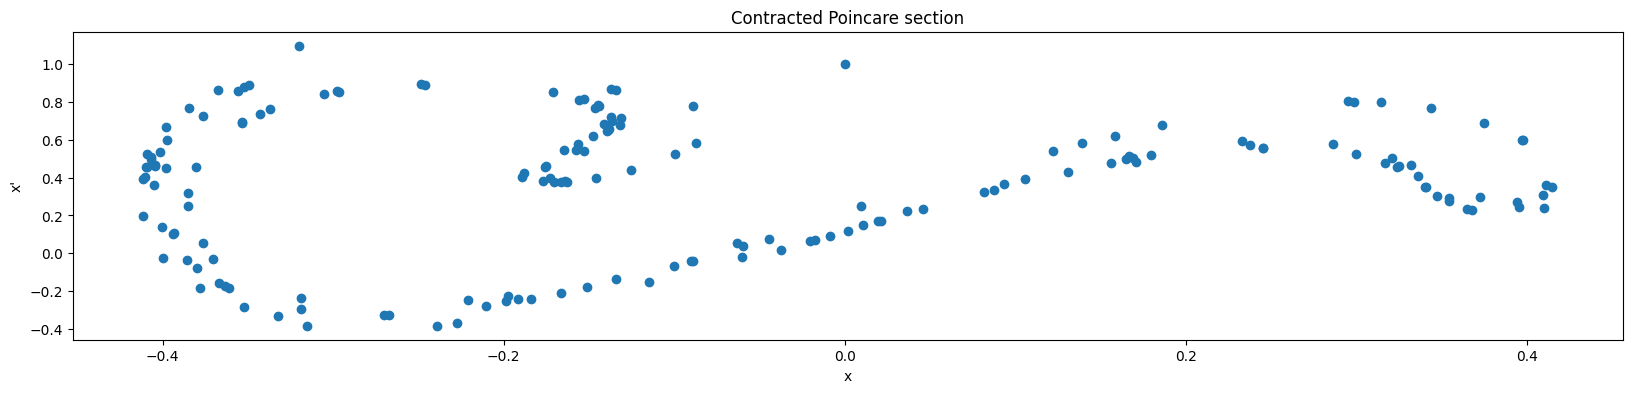

In [59]:
fig, axes = plt.subplots(1,1, figsize=(20,4))
axes.scatter(solution.y[0][ind], solution.y[1][ind])
axes.set_title('Contracted Poincare section')
axes.set_xlabel('x')
axes.set_ylabel('x\'')

In [60]:
(mu,b,c,w,k) = (1,-10,100,3.5,1.55)
def coupling(t,x,g):
    dx1 = x[1]
    dx3 = x[3]
    dx2 = k*np.cos(w*t) + g* x[3]-mu*x[1]-b*x[0]-c*(x[0]**3)
    dx4 = k*np.cos(w*t) + g* x[1]-mu*x[3]-b*x[2]-c*(x[2]**3)
    return [dx1,dx2,dx3,dx4]

In [61]:
# Create first and last points of integration
# t_start = 0
# t_end = 300
# Initial conditions
eps = 0.01
x_0 = 0
x_1 = 1
u_0 = x_0 + eps
u_1 = x_1 - eps
#t = np.linspace(t_start,t_end,10000000)

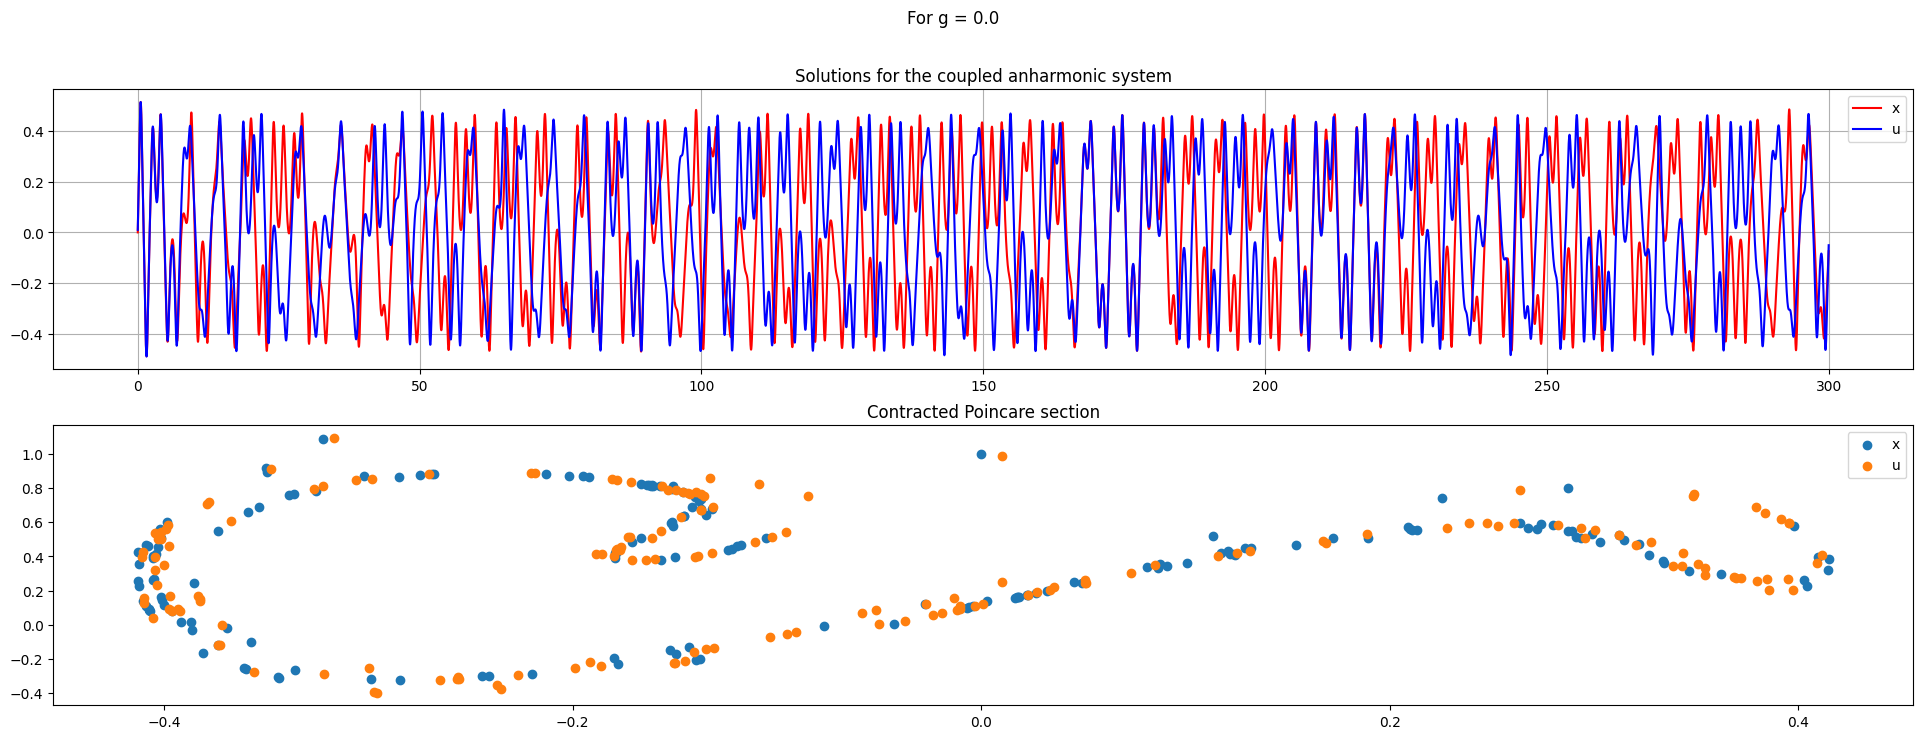

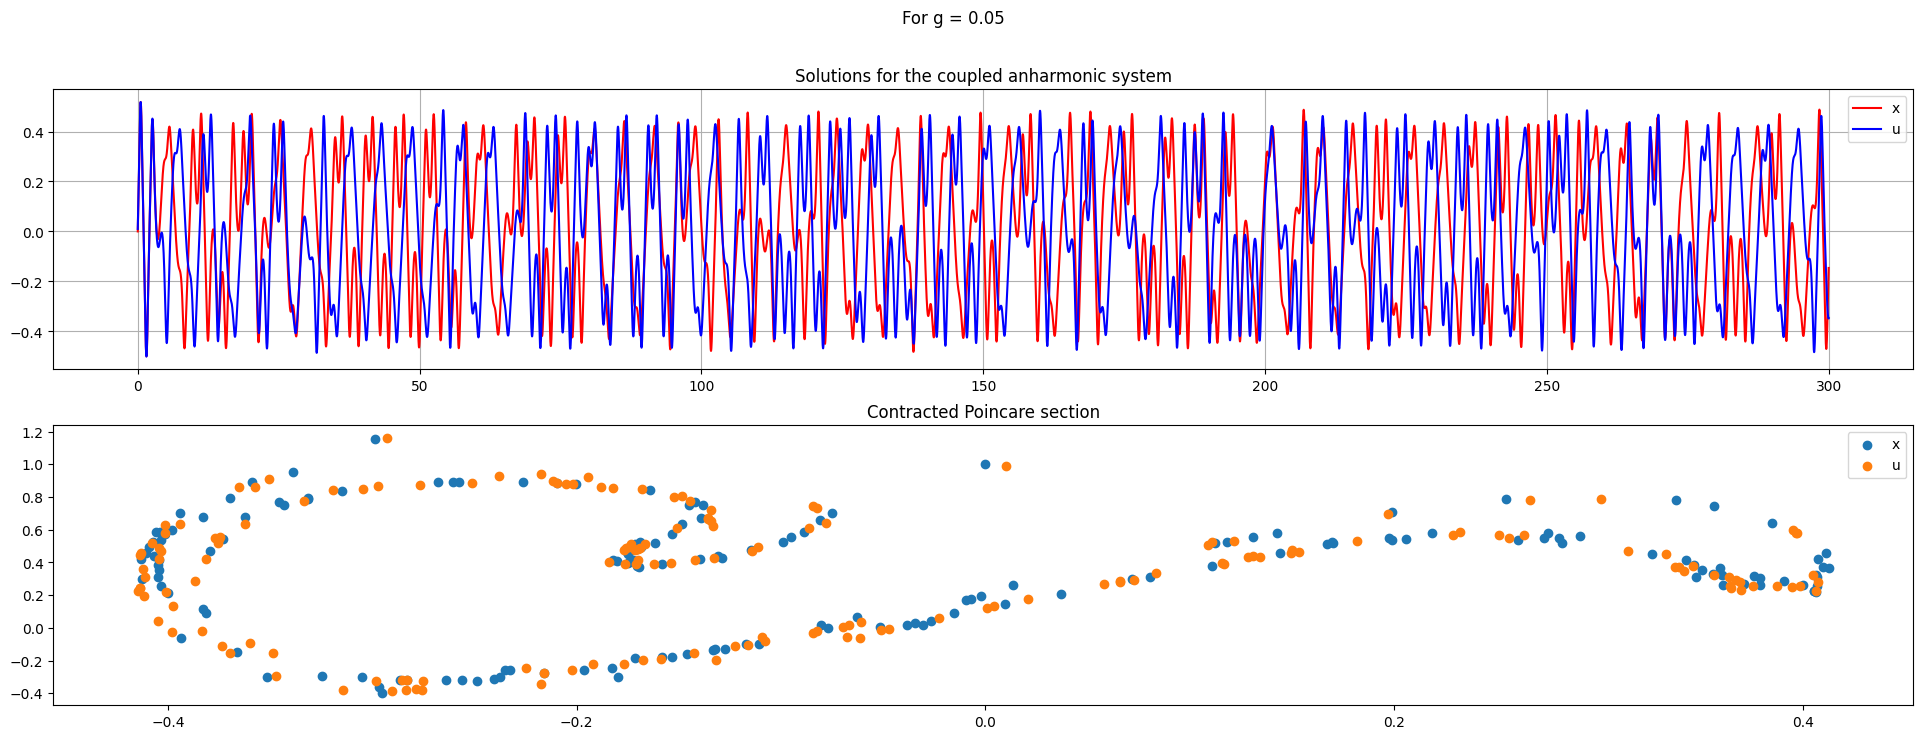

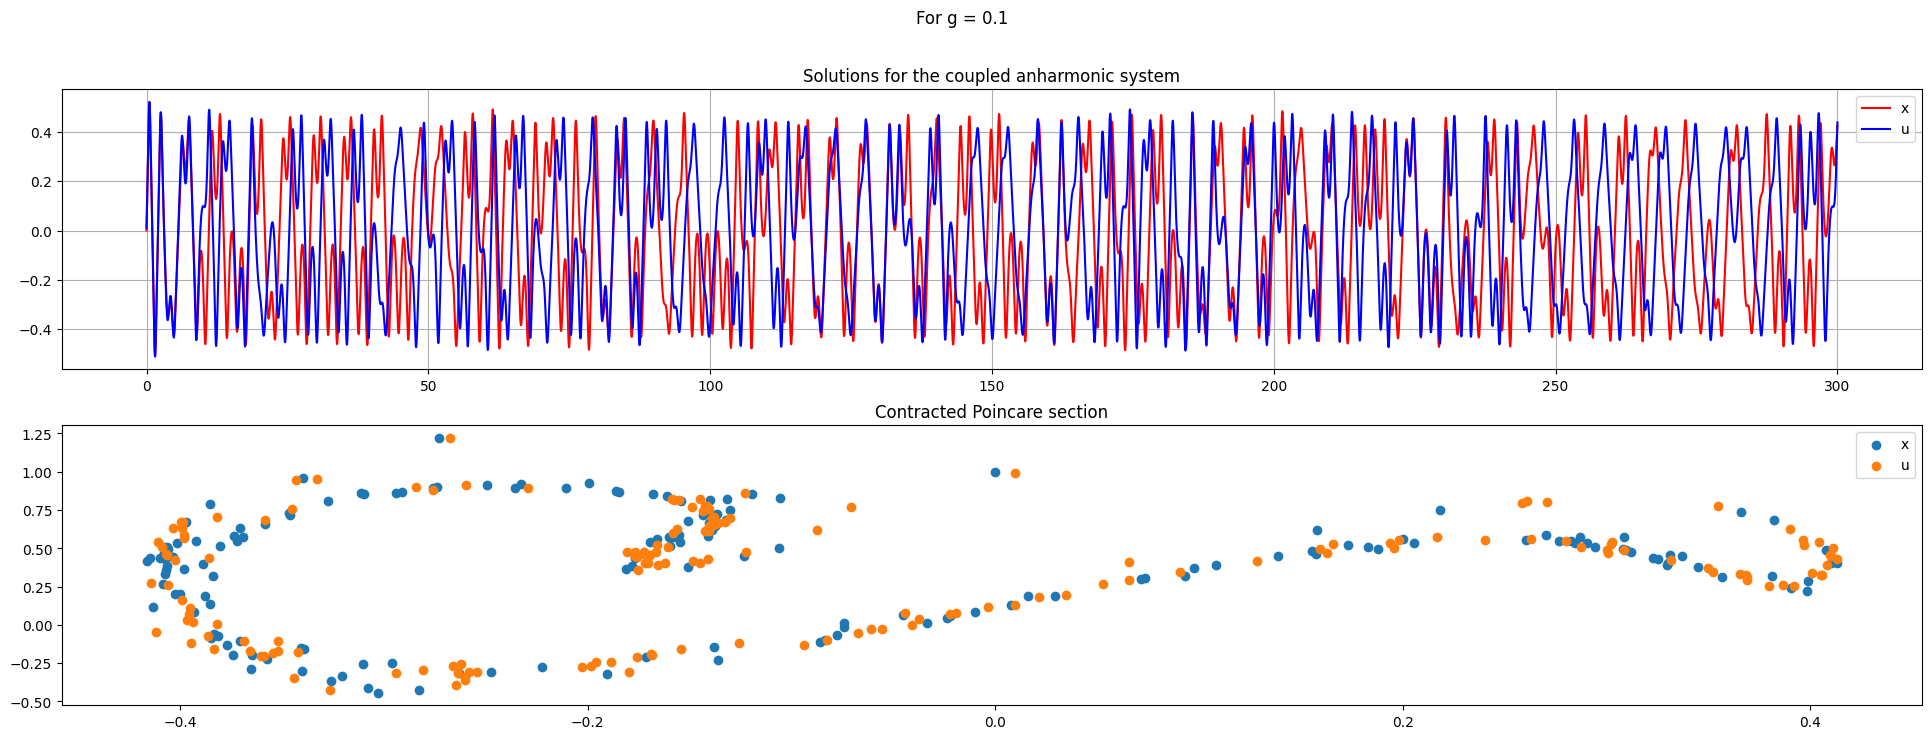

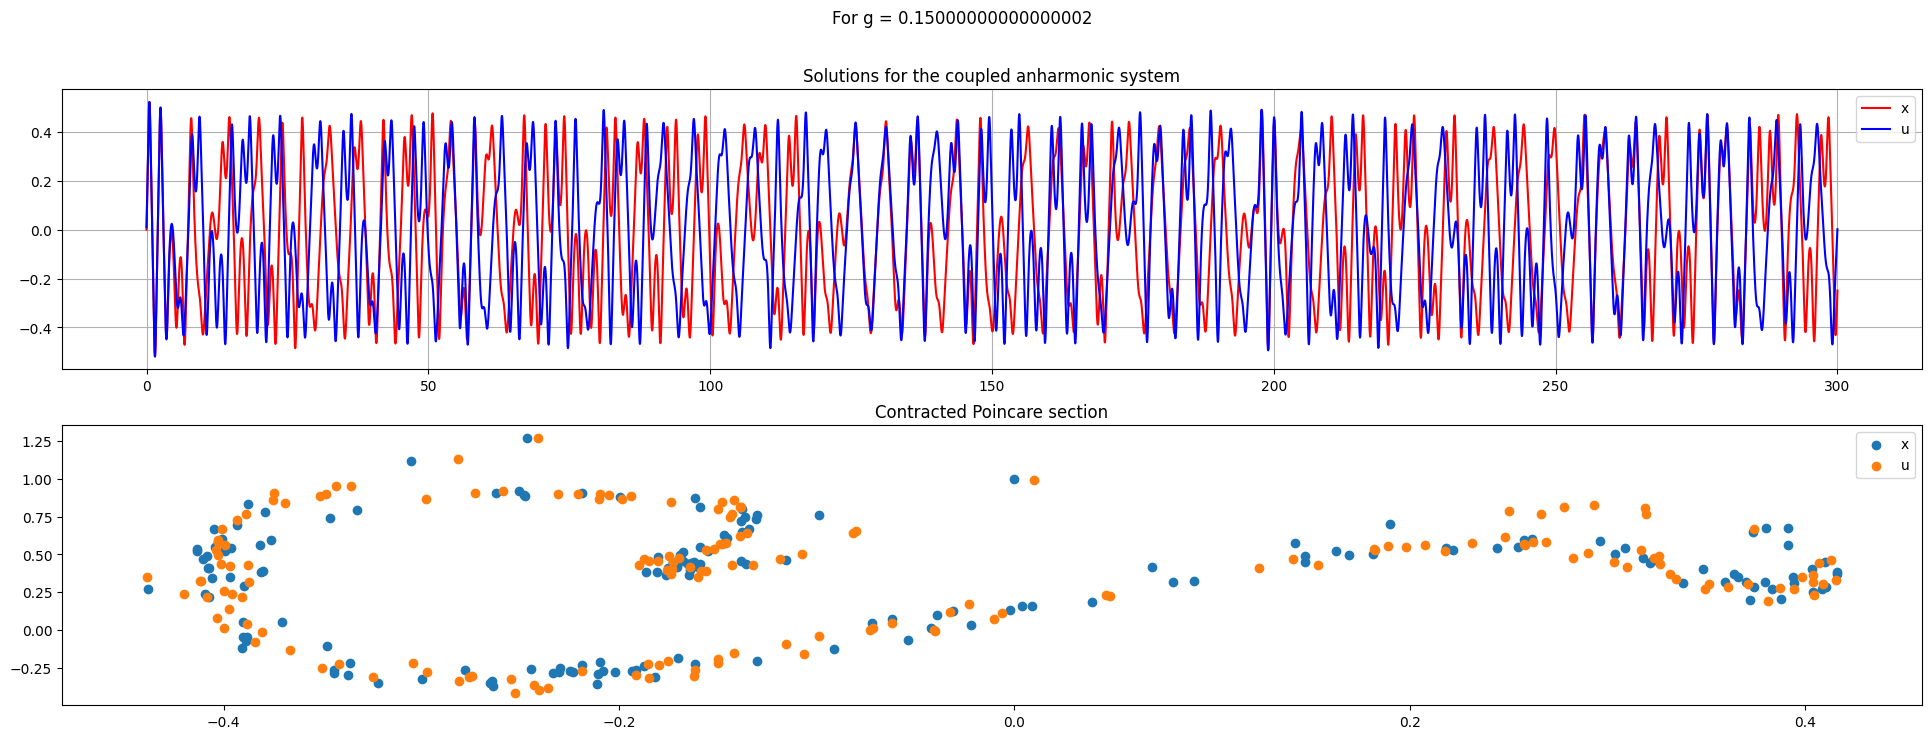

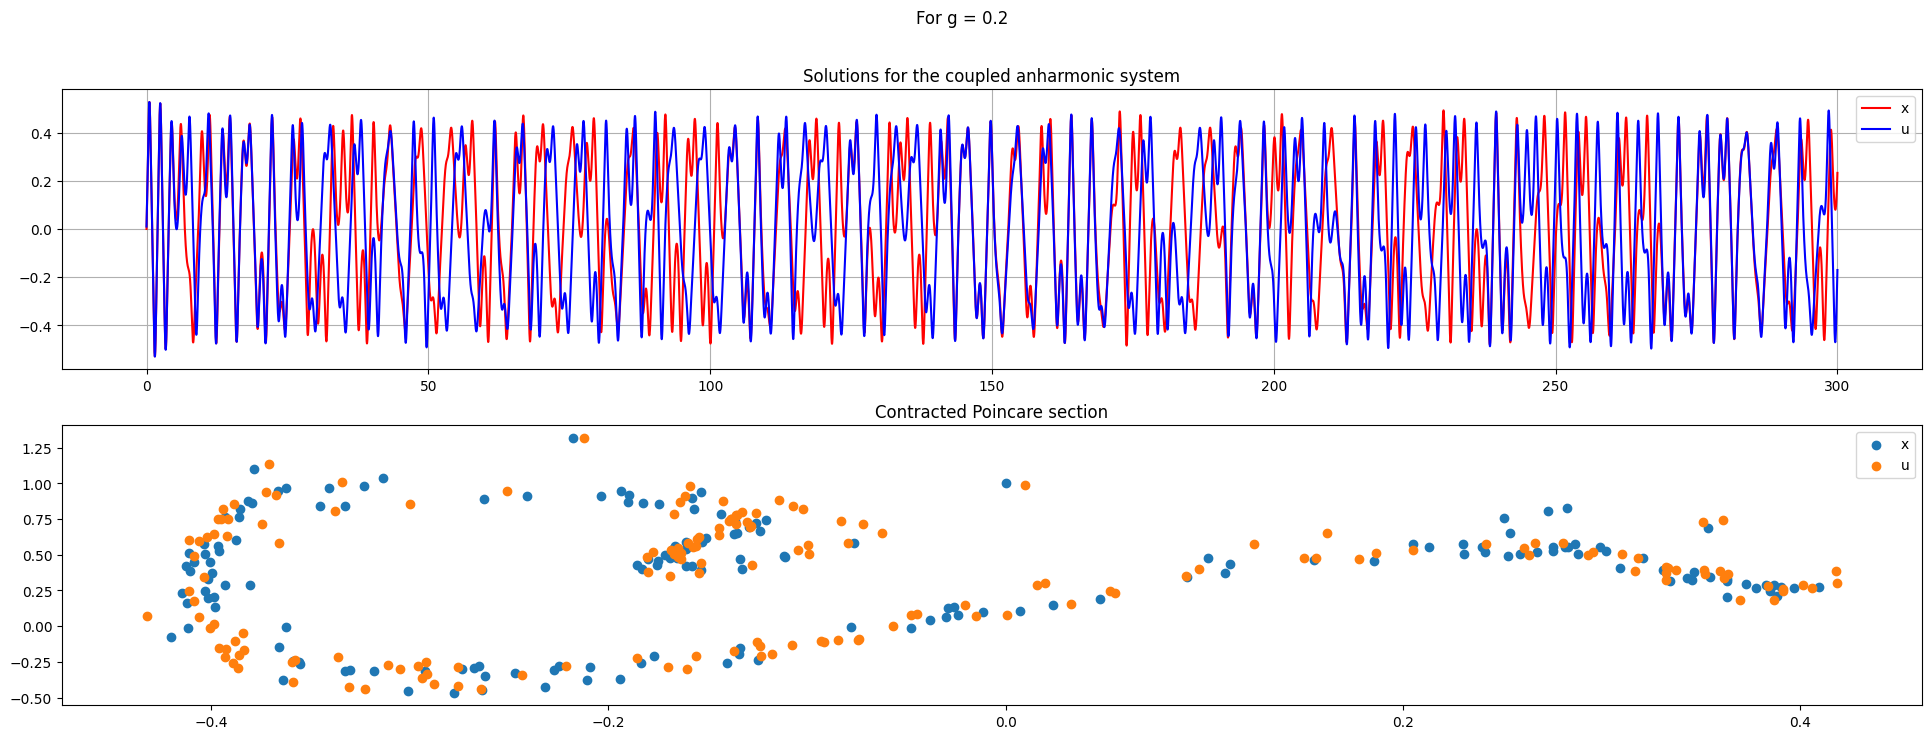

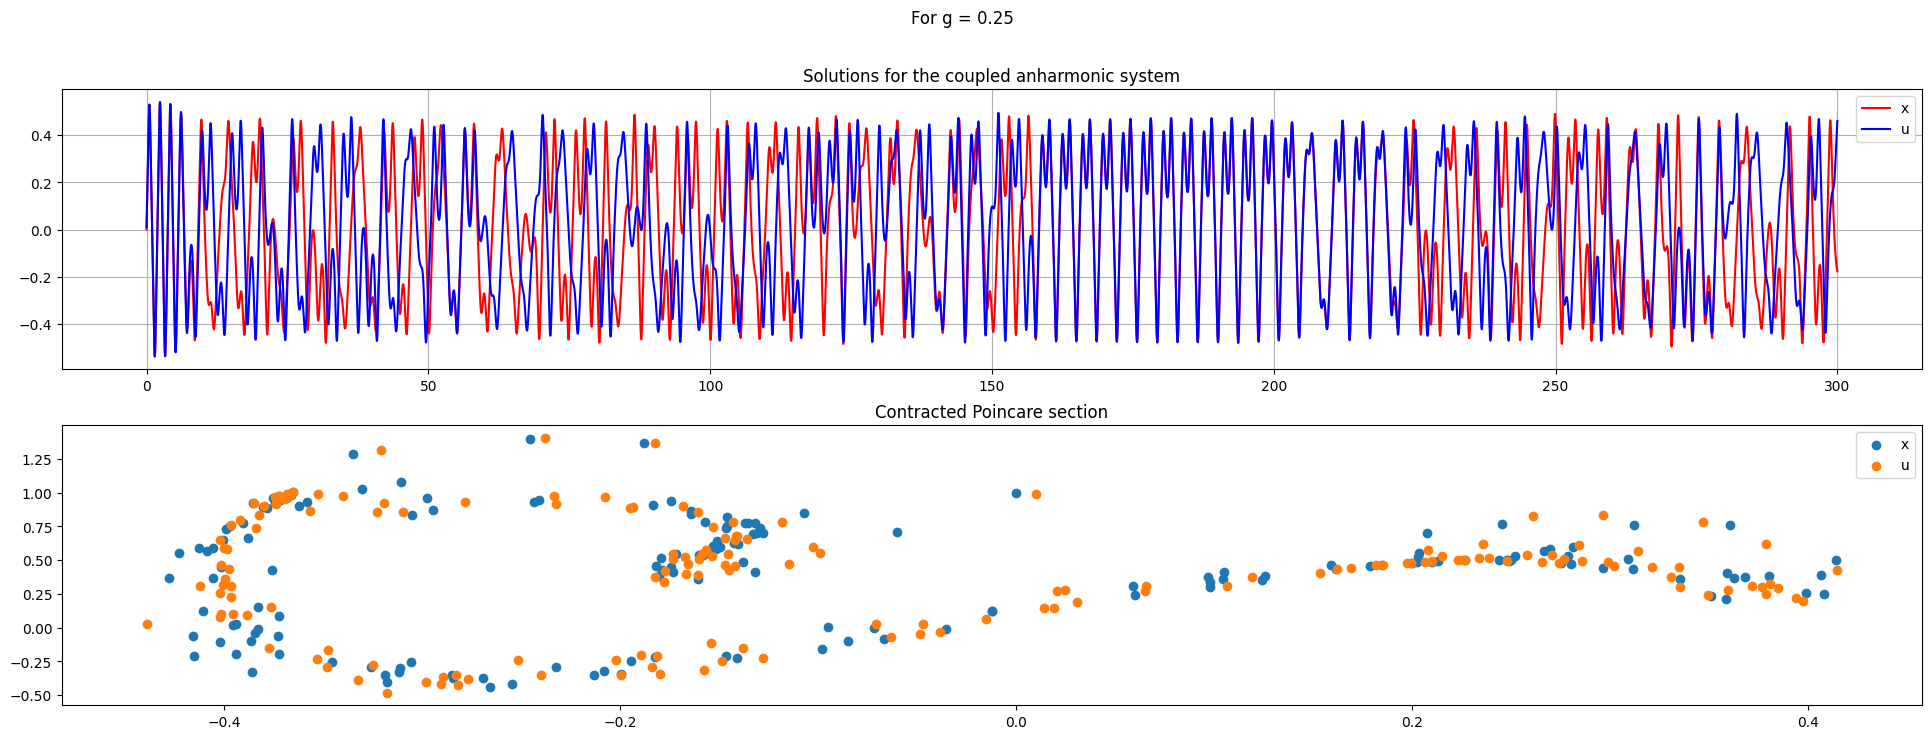

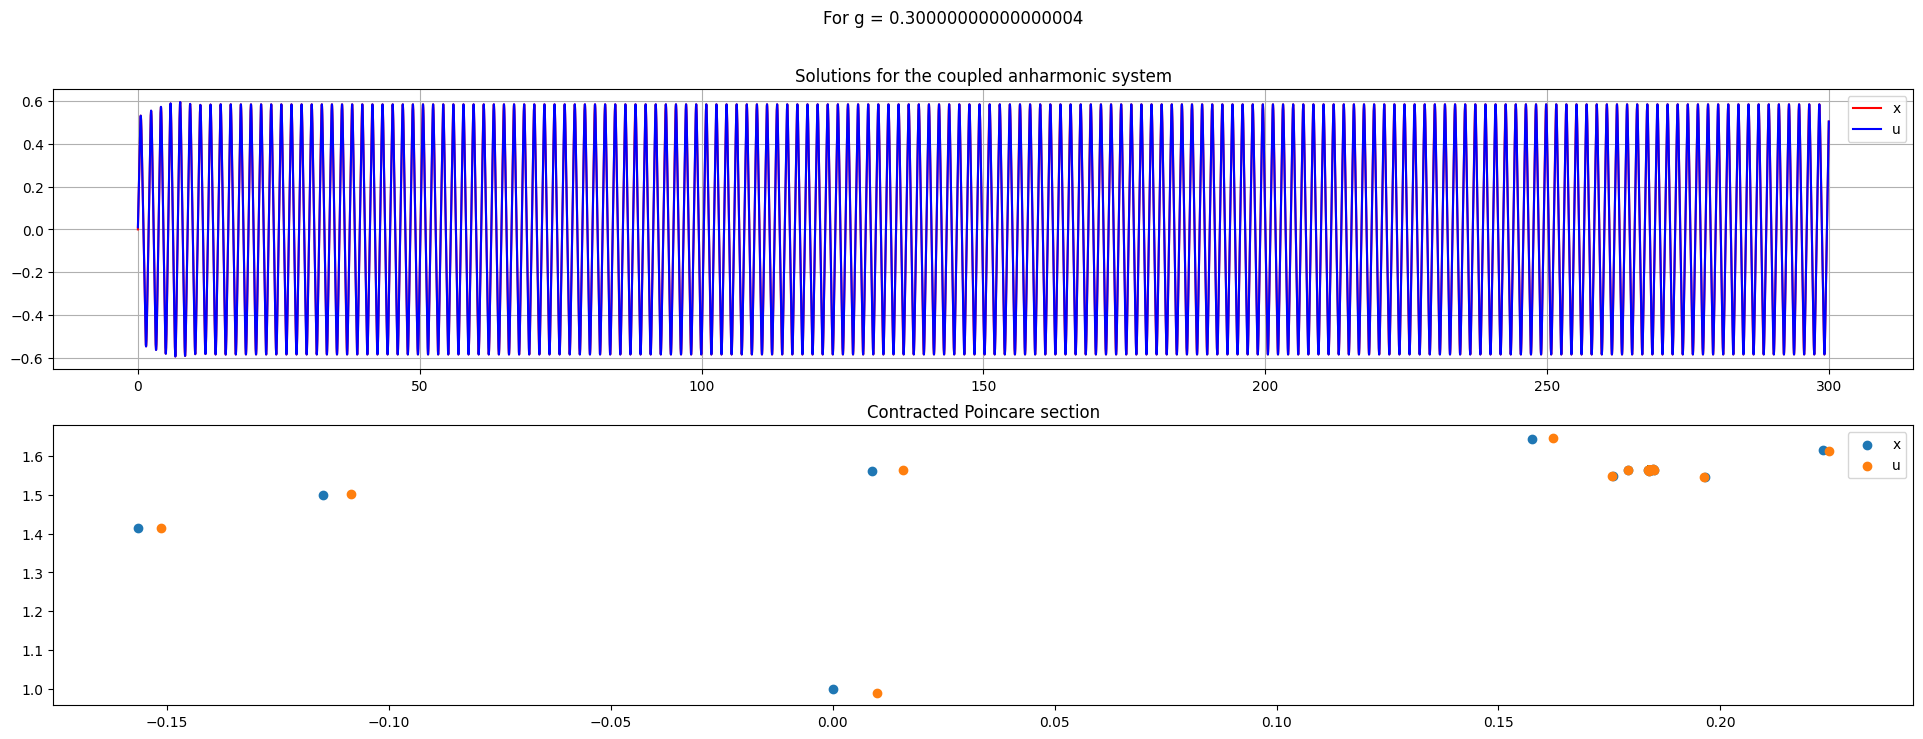

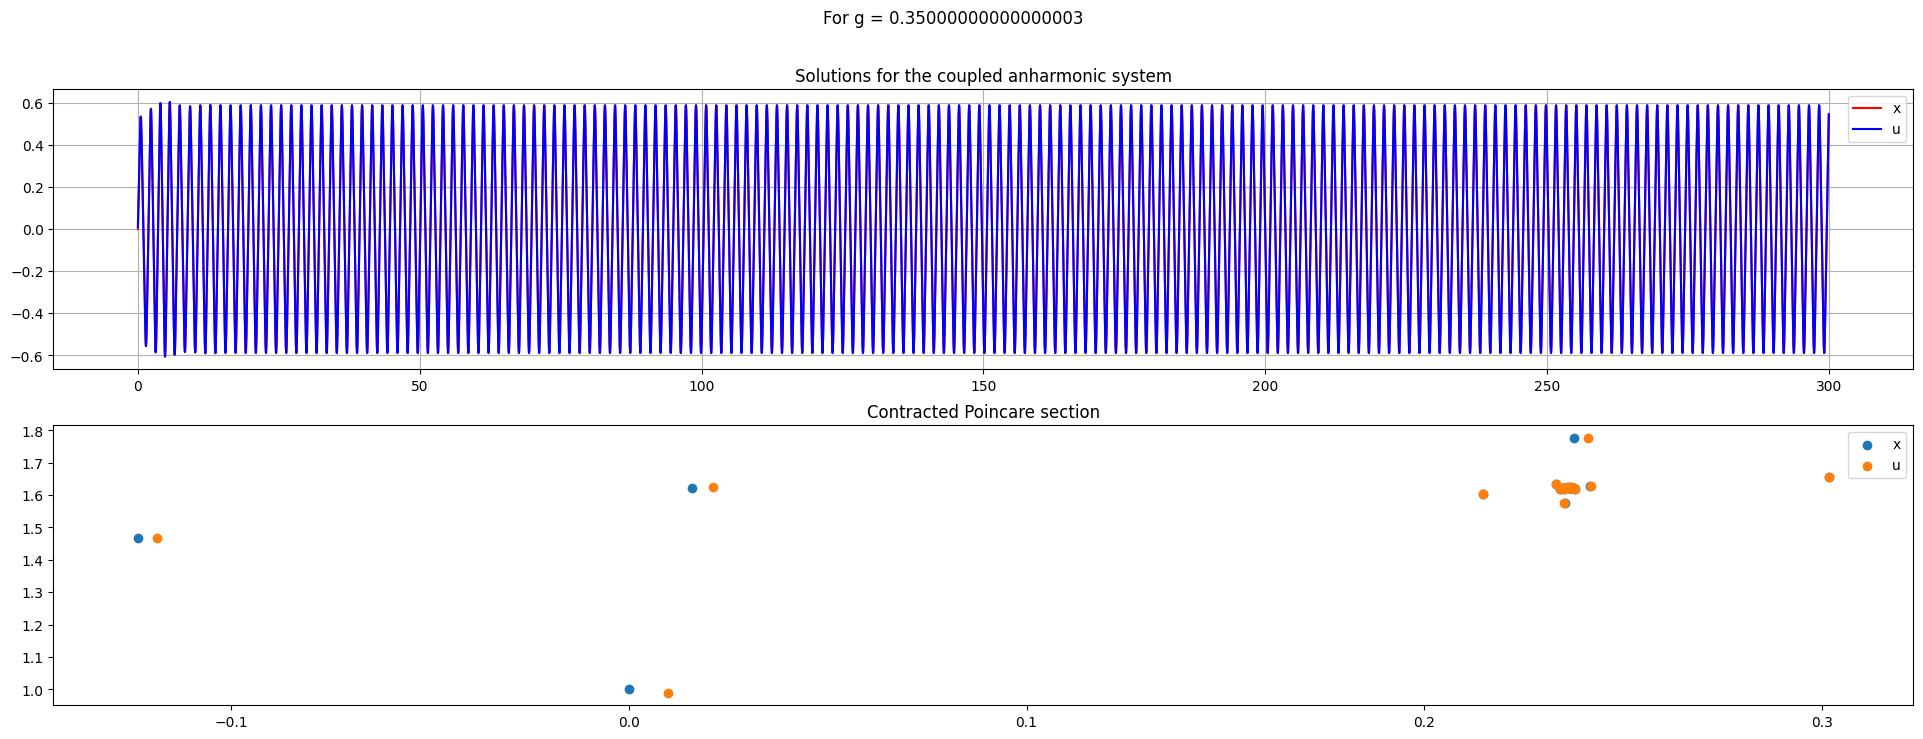

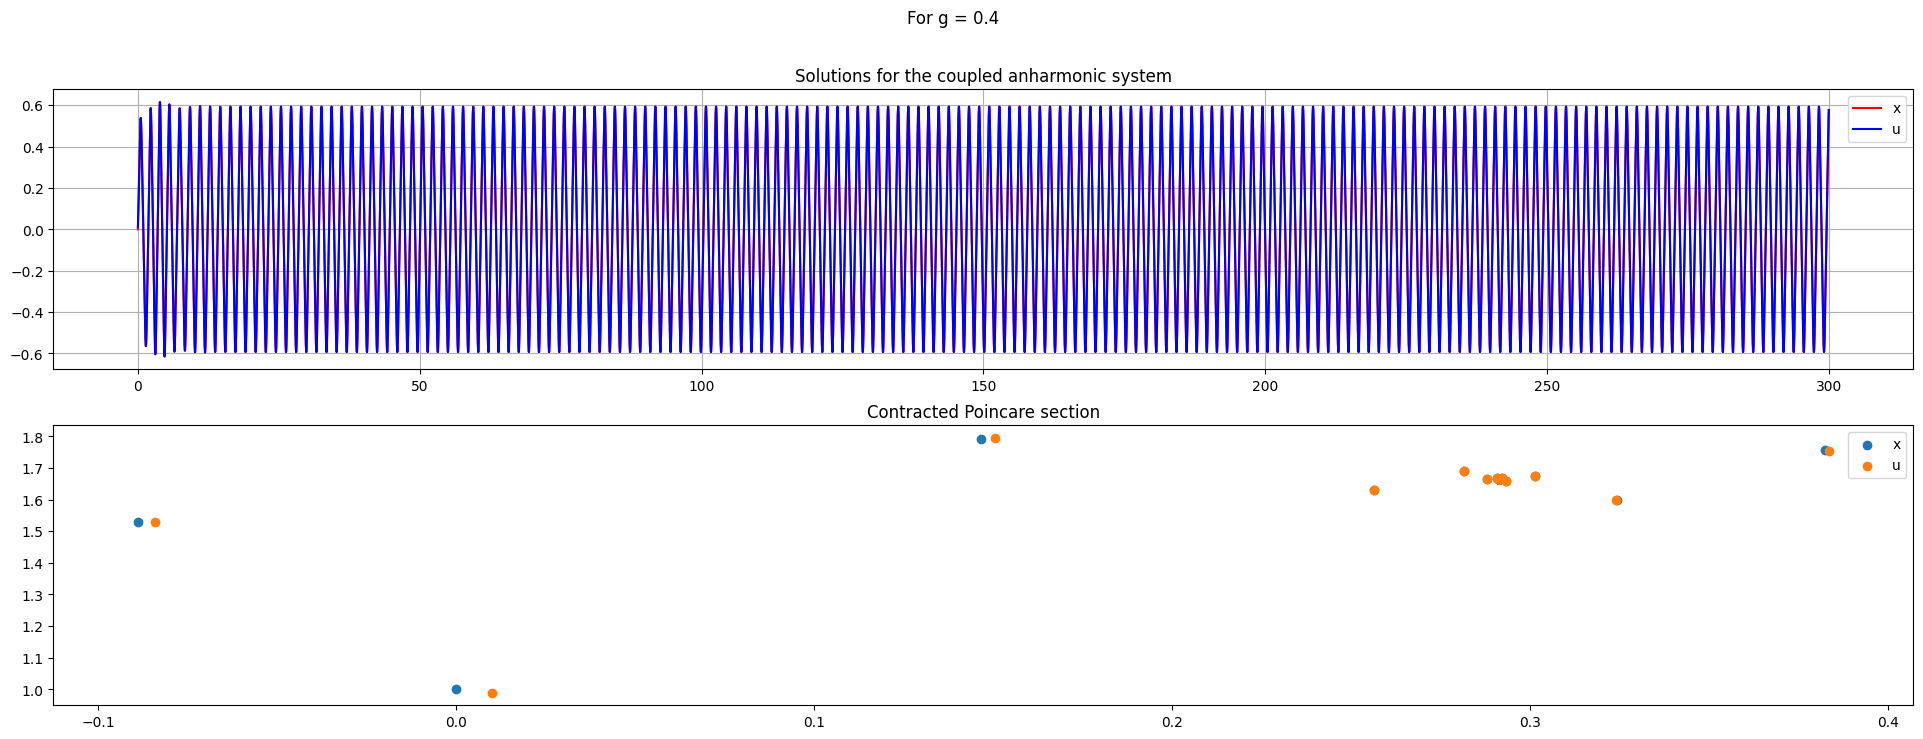

In [62]:
for g in np.linspace(0,0.4,9):
    # Integrate using solve_ivp
    solution2 = solve_ivp(coupling, (t_start, t_end),[x_0, x_1,u_0,u_1],t_eval = t,method='RK45',dense_output=True,args=(g,))
    fig, axes = plt.subplots(2,1, figsize=(24,8))
    fig.suptitle(f'For g = {g}')
    axes[0].plot(solution2.t, solution2.y[0], 'r', label="x")
    axes[0].plot(solution2.t,solution2.y[2],'b',label = 'u')
    axes[0].set_title('Solutions for the coupled anharmonic system')
    axes[0].grid()
    axes[0].legend()
    axes[1].scatter(solution2.y[0][ind], solution2.y[1][ind],label='x')
    axes[1].scatter(solution2.y[2][ind],solution2.y[3][ind],label='u')
    axes[1].set_title('Contracted Poincare section')
    axes[1].legend()
    plt.show()



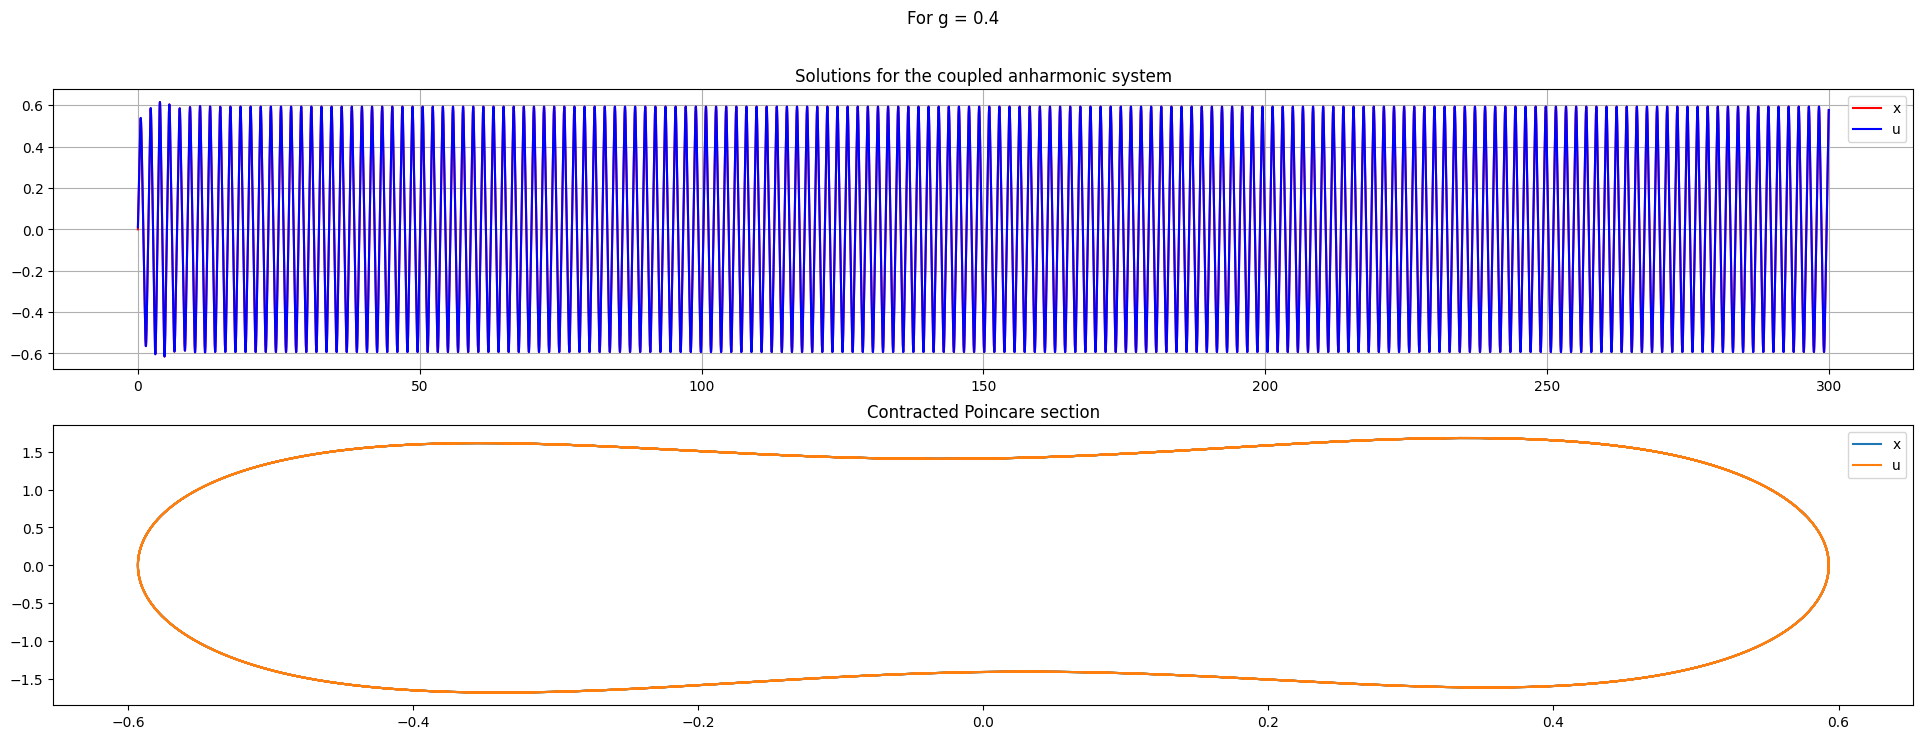

In [63]:
g = 0.4
solution3 = solve_ivp(coupling, (t_start, t_end),[x_0, x_1,u_0,u_1],t_eval = t,method='RK45',dense_output=True,args=(g,))
fig, axes = plt.subplots(2,1, figsize=(24,8))
fig.suptitle(f'For g = {g}')
axes[0].plot(solution3.t, solution3.y[0], 'r', label="x")
axes[0].plot(solution3.t,solution3.y[2],'b',label = 'u')
axes[0].set_title('Solutions for the coupled anharmonic system')
axes[0].grid()
axes[0].legend()
axes[1].plot(solution3.y[0][-200000:], solution3.y[1][-200000:],label='x')
axes[1].plot(solution3.y[2][-200000:],solution3.y[3][-200000:],label='u')
axes[1].set_title('Contracted Poincare section')
axes[1].legend()
plt.show()